# <h1 align="center"> **Comparasion of Regression and Several Machine Learning Models Salifort Motors Employee Turnover Prediction**</h1>
###<h3 align="center">Burak Can Serdar</h3>

#####<h5 align="center">[Website](https://sites.google.com/view/c-serdar) [Github](https://github.com/nocsaren) [LinkedIn](https://www.linkedin.com/in/burak-can-serdar/) [Email](c.serdar@gmail.com)

# Introduction

Salifort Motors, a leading French-based alternative energy vehicle manufacturer, is renowned for its innovative approach to designing and distributing electric, solar, algae, and hydrogen-based vehicles. With a global workforce exceeding 100,000 employees, Salifort's commitment to vertical integration has established it as a pioneer at the intersection of alternative energy and automotive technology.

However, Salifort Motors is currently facing a significant challenge: a high rate of employee turnover. This turnover encompasses both voluntary departures and terminations, posing a substantial financial burden due to the costs associated with recruiting, training, and upskilling new employees. Recognizing the importance of a stable and satisfied workforce, Salifort's senior leadership team is dedicated to creating a corporate culture that fosters employee success and professional development.

To address this issue, the leadership team conducted a comprehensive employee survey to identify the underlying factors contributing to turnover. As a data specialist at Salifort Motors, I have been tasked with analyzing this survey data to develop strategies aimed at enhancing employee retention. This report presents the results of my analysis and the models designed to predict employee turnover based on various factors, such as job title, department, number of projects, and average monthly hours.

## Question: What is the best model to predict employee turnover?

To determine the most effective model for predicting employee turnover, we deployed and evaluated several machine learning algorithms. These included logistic regression, decision tree, random forest, XGBoost, and if applicable, the cross-validated and feature-engineered versions of these approaches. Each model was assessed based on its predictive accuracy, interpretability, and practical application within the context of Salifort Motors. The goal was to identify a model that not only accurately predicts turnover but also provides actionable insights into the factors driving employee departures. By leveraging these insights, Salifort Motors can implement targeted interventions to improve retention rates, enhance job satisfaction, and reduce the financial impact of turnover.

In [1]:
# Importing necessary libraries
import pandas as pd             # For data manipulation and analysis
import numpy as np              # For numerical operations
from scipy import stats         # For statistical computations

import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns           # For data visualization

In [2]:
import os
from google.colab import drive

# Check if the script is running in a Colab environment
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

if is_colab():
    # Check if the drive is already mounted
    if not os.path.isdir('/content/drive'):
        drive.mount('/content/drive')
    else:
        print('Drive is already mounted.')
else:
    print('Not running in a Colab environment.')

Drive is already mounted.


# Data Overview

In [3]:
# Define the file path
file_path = "/content/drive/MyDrive/Projects/Salifort Motors/HR_capstone_dataset.csv"

# Check if the file exists before reading
if os.path.isfile(file_path):
    try:
        df0 = pd.read_csv(file_path)
        print("File successfully loaded.")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
else:
    print("File not found. Please check the file path.")

File successfully loaded.


In [4]:
# Displaying information about the dataframe df0 to understand its structure and characteristics.
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


To address the high turnover rate at Salifort Motors, we have utilized a comprehensive dataset titled "HR_capstone_dataset.csv." This dataset contains detailed information on 14,999 employees, covering various aspects that may influence employee retention. The data includes ten columns, each representing a distinct variable relevant to employee turnover. Here is an overview of the dataset:

|Variable  |Description | Dtype|
|-----|-----|-----|
|satisfaction_level|Employee-reported job satisfaction level |float|
|last_evaluation|Score of employee's last performance review |float||
|number_project|Number of projects the employee has worked on|integer||
|average_monthly_hours|Average monthly working hours|integer|
|time_spend_company|Number of years spent at the company (years) |integer|
|Work_accident|Whether the employee has had a work accident|binary|
|left|Whether the employee has left the company|binary|
|promotion_last_5years|Whether the employee was promoted in the last 5 years|binary|
|Department|The employee's department|string|
|salary|The employee's salary|string|

<br>


In [ ]:
# Counting the number of missing values (NaN) in each column of dataframe df0.
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
# Counting the number of duplicated rows in dataframe df0.
df0.duplicated().sum()

3008

The dataset has no missing values, ensuring the completeness and reliability of the data for analysis. However, it contains 3,008 duplicated entries, which will be addressed before proceeding with the modeling to ensure data quality and integrity.

## Descriptive Statistics

Here are the descriptive statistics for the key variables in the dataset:

In [ ]:
# Generating descriptive statistics for numerical columns in dataframe df0.
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


These statistics provide a snapshot of the central tendency, variability, and distribution of the numerical variables in the dataset. Understanding these characteristics is crucial for further data exploration, preprocessing, and modeling to predict employee turnover effectively.

# Data Cleaning

## Data Column Renaming

Renaming the columns to more descriptive and consistent names improves the readability and understanding of the dataset. For instance, 'number_project' is renamed to 'number_of_projects' to explicitly indicate the variable's meaning related to employee projects. Similarly, 'average_montly_hours' becomes 'average_monthly_hours' to correct a typographical error and maintain consistency in naming conventions.

In [ ]:
# Displaying the list of columns in dataframe df0.
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# List of new column names
colnames_new = [
    'satisfaction_level',
    'last_evaluation',
    'number_of_projects',
    'average_monthly_hours',
    'years_spent_in_company',
    'had_work_accident',
    'has_left',
    'had_promotion',
    'department',
    'salary'
]

# Ensure the number of new column names matches the existing columns
if len(df0.columns) != len(colnames_new):
    raise ValueError("The number of new column names does not match the number of existing columns.")

# Create the dictionary for renaming
colnames_replace = dict(zip(df0.columns, colnames_new))

To enhance clarity and consistency in the dataset used for analysis and modeling, I have renamed the columns. Here is the new dictionary:

<br>

 | Original Columns | New Columns | Description|
 | ---------------- | ----------- | -----------|
 | satisfaction_level | satisfaction_level|Employee-reported job satisfaction level|
 | last_evaluation | last_evaluation| Score of employee's last performance review |
 | number_project| number_of_projects | Number of projects the employee has worked on|
 | average_montly_hours | average_monthly_hours| Average monthly working hours|
 | time_spend_company | years_spent_in_company| Number of years spent at the company|
 | Work_accident | had_work_accident| Whether the employee has had a work accident|
 | left | has_left| Whether the employee has left the company
 | promotion_last_5years| had_promotion| Whether the employee was promoted in the last 5 years
 | Department | department|The employee's department
 | salary |salary| The employee's salary


The dataset (df0) is copied (df) to preserve the original data integrity. The renaming operation is then executed using the .rename() method with the specified colnames_replace dictionary, resulting in a modified dataframe (df) where columns are renamed according to the new naming scheme.

In [ ]:
# Rename the columns to a new DataFrame df
df = df0.rename(columns=colnames_replace)

# Display the first few rows of the renamed DataFrame
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_spent_in_company,had_work_accident,has_left,had_promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Handling Duplicates

In [ ]:
# Check for duplicates before dropping
initial_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows before dropping: {initial_duplicates}")

# Drop duplicate rows, keeping the first occurrence
df.drop_duplicates(keep='first', inplace=True)

# Check for duplicates after dropping
remaining_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows after dropping: {remaining_duplicates}")

Number of duplicate rows before dropping: 3008
Number of duplicate rows after dropping: 0


Given that the initial dataset contains 3,008 duplicated rows, it is crucial to remove these duplicates to ensure data quality and integrity. The following steps were taken to handle duplicates:

Removing Duplicates: The duplicates in the dataset were removed using the .drop_duplicates() method. This method retains the first occurrence of each duplicated row and discards the subsequent duplicates.

Verification: To confirm that all duplicates have been removed, the .duplicated().sum() method was used to count any remaining duplicated rows in the dataset.

## Identifying Outliers

To ensure the robustness and accuracy of our analysis, it is essential to identify and handle potential outliers in key variables. Here, we focus on three variables: number_of_projects, average_monthly_hours, and years_spent_in_company.

Boxplots are a useful visualization tool for detecting outliers. They display the distribution of data and highlight values that deviate significantly from the rest of the dataset. Let's analyze these variables using boxplots.

### Number of Projects (number_of_projects)

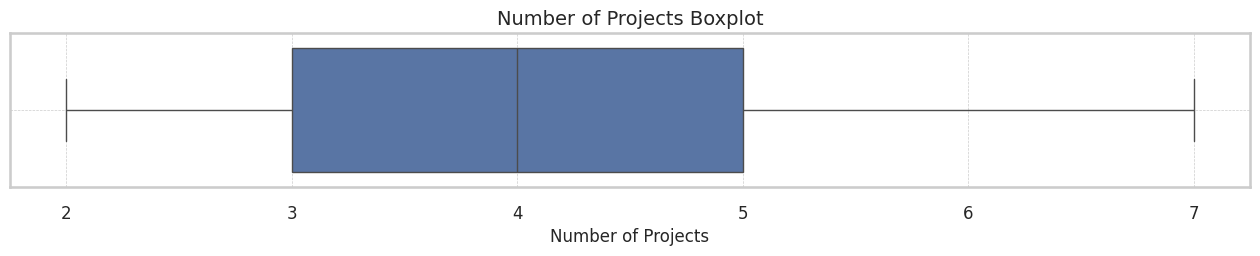

In [ ]:
# Reset Seaborn defaults and set the style
sns.set(style='whitegrid', context='talk')

# Create a figure with specified size
plt.figure(figsize=(16, 2))

# Create a boxplot for 'number_of_projects' column
sns.boxplot(data=df, x='number_of_projects')

# Set plot title and labels
plt.title("Number of Projects Boxplot", fontsize=14)
plt.xlabel("Number of Projects", fontsize=12)

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize tick parameters for readability
plt.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.show()

In [ ]:
# Generating descriptive statistics for the column 'number_of_projects' in dataframe df.
df['number_of_projects'].describe()

count    11991.000000
mean         3.802852
std          1.163238
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_of_projects, dtype: float64

The distribution of Number of Projects shows some variability but does not indicate outlier presence.

### Average Monthly Hours (average_monthly_hours)

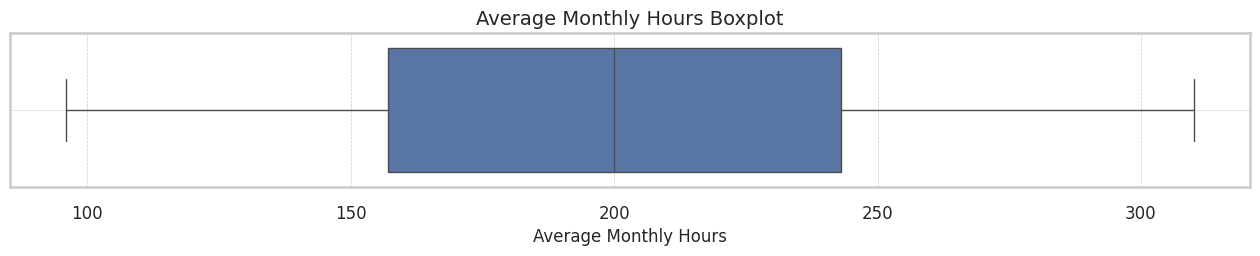

In [ ]:
# Reset Seaborn defaults and set the style
sns.set(style='whitegrid', context='talk')

# Create a figure with specified size
plt.figure(figsize=(16, 2))

# Create a boxplot for 'average_monthly_hours' column
sns.boxplot(data=df, x='average_monthly_hours')

# Set plot title and labels
plt.title("Average Monthly Hours Boxplot", fontsize=14)
plt.xlabel("Average Monthly Hours", fontsize=12)

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize tick parameters for readability
plt.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.show()

In [ ]:
# Generating descriptive statistics for the column 'average_monthly_hours' in dataframe df.
df['average_monthly_hours'].describe()

count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: average_monthly_hours, dtype: float64

The distribution of Average Monthly Hours does not appear to have outliers. Summary statistics of the variable supports this.

### Years Spent in Company (years_spent_in_company)

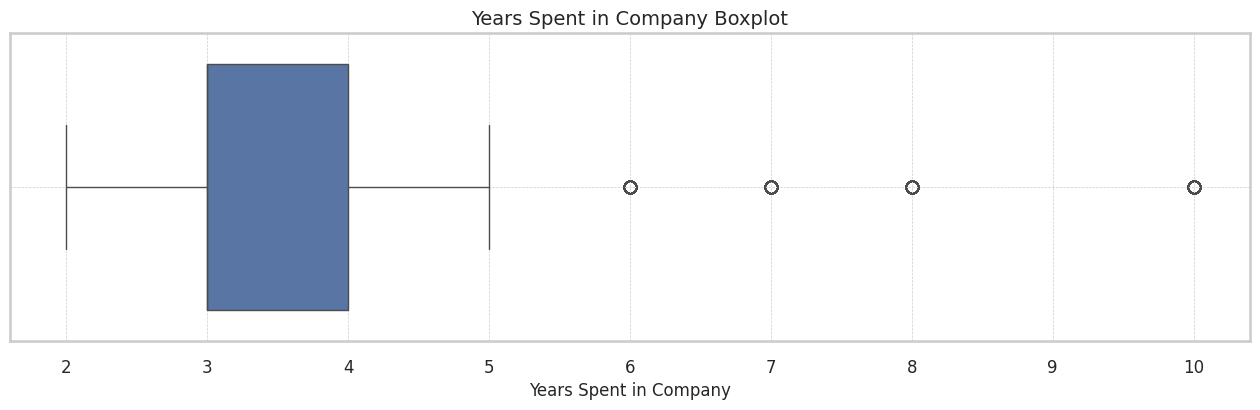

In [ ]:
# Reset Seaborn defaults and set the style
sns.set(style='whitegrid', context='talk')

# Create a figure with specified size
plt.figure(figsize=(16, 4))  # Adjusted height for better visualization

# Create a boxplot for 'years_spent_in_company' column
sns.boxplot(data=df, x='years_spent_in_company')

# Set plot title and labels
plt.title("Years Spent in Company Boxplot", fontsize=14)
plt.xlabel("Years Spent in Company", fontsize=12)

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize tick parameters for readability
plt.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.show()

This variable shows distinct outliers on the higher end, particularly for employees who have spent 6, 7, 8, or 10 years at the company.

In [ ]:
# Generating descriptive statistics for the column 'years_spent_in_company' in dataframe df.
df['years_spent_in_company'].describe()

count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: years_spent_in_company, dtype: float64

#### Outlier Analysis and Distribution of Years Spent in Company (years_spent_in_company) Variable

In [ ]:
# Calculate percentiles and interquartile range (IQR)
percentile25 = df['years_spent_in_company'].quantile(0.25)
percentile75 = df['years_spent_in_company'].quantile(0.75)
iqr = percentile75 - percentile25

# Calculate upper and lower limits for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Print the calculated limits
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Find outliers based on the calculated limits
outliers = df[(df['years_spent_in_company'] > upper_limit) | (df['years_spent_in_company'] < lower_limit)]

# Print the number of rows containing outliers
print("Number of rows in the data containing outliers in 'years_spent_in_company':", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in 'years_spent_in_company': 824


In [ ]:
# Generating descriptive statistics for the variable outliers.
outliers.describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_spent_in_company,had_work_accident,has_left,had_promotion
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,0.598677,0.727269,4.030340,204.932039,6.830097,0.179612,0.132282,0.050971
std,0.264996,0.177934,1.126421,50.728714,1.377750,0.384097,0.339002,0.220072
min,0.120000,0.360000,2.000000,97.000000,6.000000,0.000000,0.000000,0.000000
25%,0.377500,0.580000,3.000000,163.000000,6.000000,0.000000,0.000000,0.000000
50%,0.640000,0.745000,4.000000,214.000000,6.000000,0.000000,0.000000,0.000000
75%,0.820000,0.880000,5.000000,248.000000,7.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,293.000000,10.000000,1.000000,1.000000,1.000000


The IQR method identifies outliers as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
This method found 824 outliers in the tenure variable.

In [ ]:
# Calculate Z-scores for 'years_spent_in_company' column
z_scores = np.abs(stats.zscore(df[['years_spent_in_company']]))

# Identify outliers based on Z-score threshold of 3
outliers = df[(z_scores > 3).all(axis=1) | (z_scores < -3).all(axis=1)]

# Describe outliers to understand their characteristics
outliers.describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_spent_in_company,had_work_accident,has_left,had_promotion
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.0,188.000000
mean,0.659521,0.723085,3.723404,196.888298,9.138298,0.250000,0.0,0.069149
std,0.215420,0.160027,0.969086,48.260581,0.993035,0.434169,0.0,0.254385
min,0.140000,0.370000,2.000000,100.000000,8.000000,0.000000,0.0,0.000000
25%,0.530000,0.607500,3.000000,154.000000,8.000000,0.000000,0.0,0.000000
50%,0.655000,0.730000,4.000000,199.500000,10.000000,0.000000,0.0,0.000000
75%,0.832500,0.860000,4.000000,240.000000,10.000000,0.250000,0.0,0.000000
max,0.990000,1.000000,6.000000,284.000000,10.000000,1.000000,0.0,1.000000


The Z-score method identifies outliers based on the number of standard deviations a data point is from the mean.
Using a threshold of 3 (common practice) identified 188 outliers. This difference signifies non-normality in data. We check with a histogram:

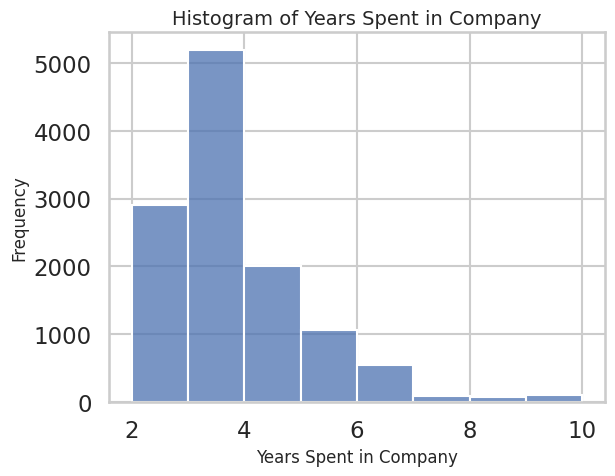

In [ ]:
# Reset Seaborn defaults and set the style
sns.set(style='whitegrid', context='talk')

# Create a histogram using Seaborn
sns.histplot(df["years_spent_in_company"], bins=8)

# Set plot title and labels
plt.title("Histogram of Years Spent in Company", fontsize=14)
plt.xlabel("Years Spent in Company", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Display the plot
plt.show()

As we guessed the histogram of "years_spent_in_company" shows a significantly right-tailed distribution, indicating a concentration of employees with fewer years at the company and a long tail of employees with many years. When we lower the threshold to 1.5:

In [ ]:
# Calculate Z-scores for 'years_spent_in_company' column
z_scores = np.abs(stats.zscore(df[['years_spent_in_company']]))

# Identify outliers based on Z-score threshold of 1.5
outliers = df[(z_scores > 1.5).all(axis=1) | (z_scores < -1.5).all(axis=1)]

# Describe outliers to understand their characteristics
outliers.describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_spent_in_company,had_work_accident,has_left,had_promotion
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,0.598677,0.727269,4.030340,204.932039,6.830097,0.179612,0.132282,0.050971
std,0.264996,0.177934,1.126421,50.728714,1.377750,0.384097,0.339002,0.220072
min,0.120000,0.360000,2.000000,97.000000,6.000000,0.000000,0.000000,0.000000
25%,0.377500,0.580000,3.000000,163.000000,6.000000,0.000000,0.000000,0.000000
50%,0.640000,0.745000,4.000000,214.000000,6.000000,0.000000,0.000000,0.000000
75%,0.820000,0.880000,5.000000,248.000000,7.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,293.000000,10.000000,1.000000,1.000000,1.000000


Now our result is aligned with the IQR method, identifying 824 outliers. We will treat these outlier when we use outlier sensitive methods like regression analysis.

# Model Construction


## Preparation

In preparation for building models to predict employee turnover at Salifort Motors, it is essential to preprocess the data appropriately. This involves encoding non-numeric variables to make them suitable for model input.

 ### Encoding Categorical Variables

The dataset includes two non-numeric variables: department and salary. Each needs to be encoded to facilitate effective model training.

#### 1. Salary: Ordinal Encoding

The salary variable is ordinal, with a natural hierarchy of levels. It is more appropriate to convert this variable to numeric values that reflect this order, rather than creating dummy variables. The levels will be encoded as follows:

In [ ]:
df_encod = df.copy()

# Encode 'salary' column
df_encod['salary'] = (
    df_encod['salary'].astype('category')  # Convert to categorical type
    .cat.set_categories(['low', 'medium', 'high'])  # Set specific categories
    .cat.codes  # Encode as numerical codes
)

#### 2. Department: Dummy Encoding

The department variable is categorical with multiple categories. For modeling purposes, it will be dummy-encoded. This process converts each category into a binary (0 or 1) column, allowing the models to process the categorical information effectively. Here is the approach:

In [ ]:
# Applying one-hot encoding to dataframe df_encod with drop_first=False.
df_encod = pd.get_dummies(df_encod, drop_first=False)

### Data Preparation Results

#### Dataframe Head

After encoding the categorical variables department and salary, the dataframe df_encod now includes dummy variables for department and numeric encoding for salary. Below are the head and descriptive statistics of the newly created dataframe.

In [ ]:
# Displaying the first few rows of the encoded dataframe df_encod.
df_encod.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_spent_in_company,had_work_accident,has_left,had_promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


#### Descriptive Statistics

Summary statistics of the encoded dataframe:

In [ ]:
# Generating descriptive statistics for all columns in the encoded dataframe df_encod.
df_encod.describe(include="all")

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_spent_in_company,had_work_accident,has_left,had_promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000,11991,11991,11991,11991,11991,11991,11991,11991,11991,11991
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11015,11297,11370,11390,11555,11318,11305,8752,10170,9747
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,0.60387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.63590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Correlation of Variables Heatmap

The heatmap below visualizes the correlations between the variables in the encoded dataset. This visualization helps in understanding the relationships between different features and the target variable, has_left, which indicates whether an employee left the company.

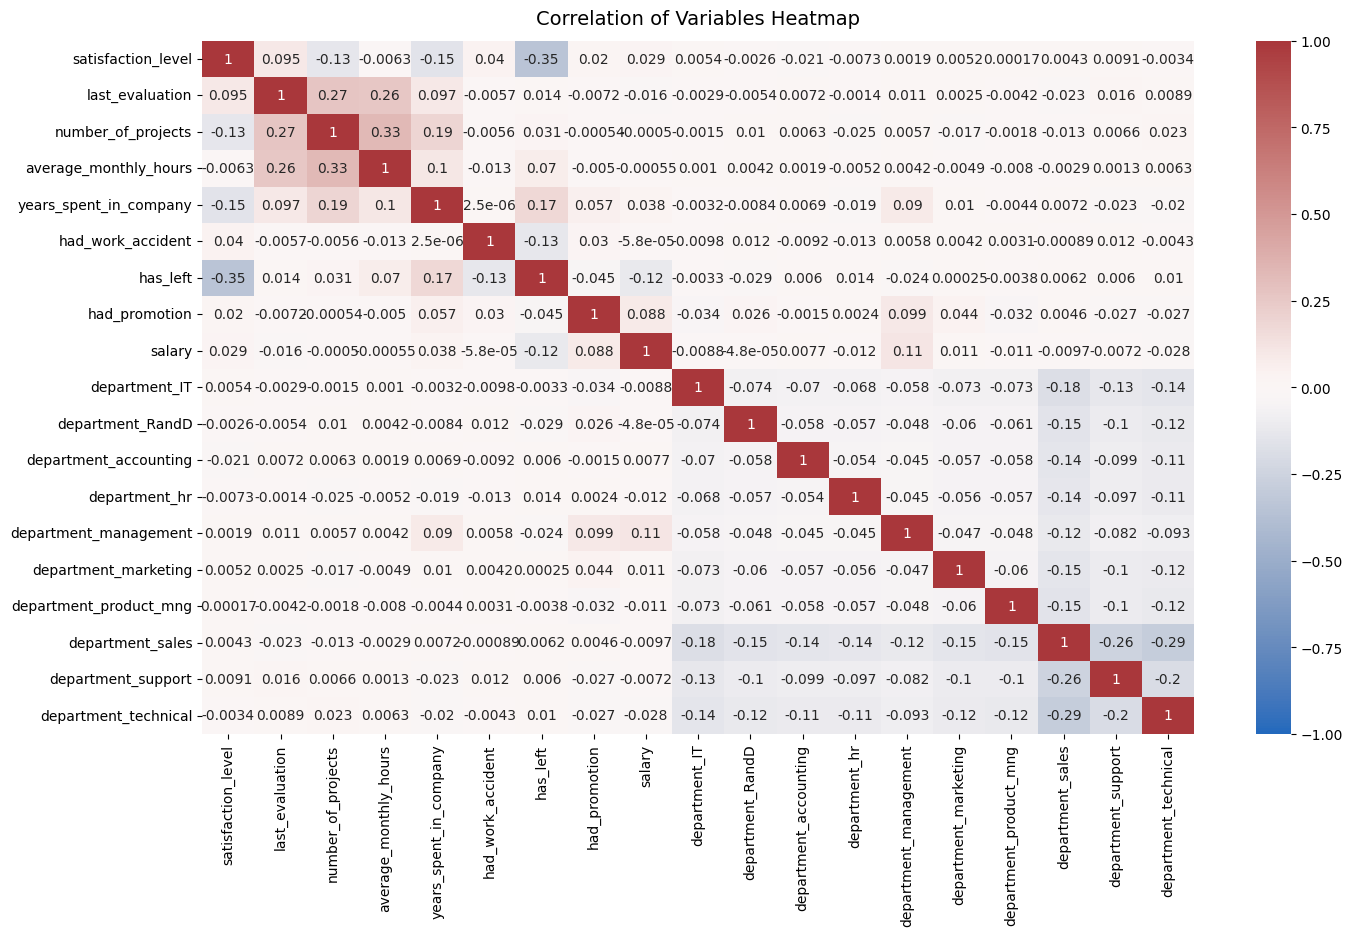

CPU times: user 1.25 s, sys: 158 ms, total: 1.41 s
Wall time: 1.29 s


In [ ]:
# Wall time: 1.33 s
%%time
# Reset Seaborn defaults
sns.reset_defaults()

plt.figure(figsize=(16, 9))

# Create heatmap of correlation matrix
heatmap = sns.heatmap(df_encod.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))

# Set title and adjust padding
heatmap.set_title('Correlation of Variables Heatmap', fontdict={'fontsize':14}, pad=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

The heatmap visualization reveals several notable correlations between variables in the dataset. These insights are crucial for understanding the relationships within the data and identifying key factors influencing employee turnover at Salifort Motors.

+ Negative Correlation
  + Satisfaction Level and Turnover (has_left):
    + Correlation Coefficient: Moderate (-0.35)
    + Interpretation: There is a moderate negative correlation between satisfaction_level and has_left. This indicates that as the satisfaction level of employees decreases, the likelihood of them leaving the company increases. Improving employee satisfaction could thus be a critical factor in reducing turnover.

+ Positive Correlation
  + Last Evaluation and Number of Projects:
    + Correlation Coefficient: Moderate (0.27)
    + Interpretation: There is a moderate positive correlation between last_evaluation and number_of_projects. This suggests that employees who receive higher evaluations tend to be involved in more projects. This relationship might indicate that high-performing employees are given more responsibilities.

  + Last Evaluation and Average Monthly Hours:
    + Correlation Coefficient: Moderate (0.26)
    + Interpretation: There is a moderate positive correlation between last_evaluation and average_monthly_hours. Employees who work more hours tend to receive higher evaluations. This could reflect the company's recognition of dedication and hard work through performance evaluations.

  + Number of Projects and Average Monthly Hours:
    + Correlation Coefficient: Moderate (0.33)
    + Interpretation: There is a moderate positive correlation between number_of_projects and average_monthly_hours. Employees handling more projects also tend to work more hours monthly. This correlation suggests a direct link between workload and work hours, highlighting potential areas for workload management to prevent burnout.

  + Years Spent in Company and Turnover:
    + Correlation Coefficient: Weak (0.17)
    + Interpretation: There is a weak positive correlation between years_spent_in_company and has_left. This suggests that employees who have been with the company longer are slightly more likely to leave. This could be due to various factors, such as seeking new challenges, burnout, or dissatisfaction with long-term career prospects within the company.


### Conclusion of Preparation

During the data preparation and initial analysis stages, it was observed that some variables had unexpected correlations. For example, the weak positive correlation between years_spent_in_company and turnover (has_left) suggests that long-term employees may be more likely to leave, which is counterintuitive and warrants further investigation. Additionally, the moderate positive correlations between last_evaluation and both number_of_projects and average_monthly_hours indicate potential overwork or overcommitment among high performers, which could be a factor in turnover.

## Models

### Logistic Regression


**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

In [ ]:
# Importing necessary libraries for model evaluation and training-test split.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

Logistic regression is sensitive to outliers, which can adversely affect the model's performance and interpretability. During the data cleaning phase, outliers in the variable years_spent_in_company were identified. To ensure the robustness of our logistic regression model, a specific dataframe (df_log) excluding these outliers will be created and used in our analysis.

In [ ]:
# Select rows without outliers in 'years_spent_in_company' and save resulting dataframe in a new variable
df_log = df_encod[(df_encod['years_spent_in_company'] >= lower_limit) & (df_encod['years_spent_in_company'] <= upper_limit)]

# Print summary information
print(f"df_encod: {df_encod.shape[0]} rows\n\
df_log: {df_log.shape[0]} rows\n\
removed: {df_encod.shape[0] - df_log.shape[0]} rows")

df_encod: 11991 rows
df_log: 11167 rows
removed: 824 rows


After handling outliers in the years_spent_in_company variable, the next step in our analysis involves splitting the dataset of predictor variables into X_log dataframe and the target variable "has_left" into y_logdataframe. This separation facilitates the construction and evaluation of our logistic regression model.

In [ ]:
# Extract target variable 'has_left' into y_log
y_log = df_log["has_left"]

# Copy DataFrame for features and drop the target variable
X_log = df_log.drop(columns=["has_left"]).copy()

To develop and validate our logistic regression model for predicting employee turnover at Salifort Motors, we performed a train-test split on the X_log and y_log dataframes. This step is crucial for assessing the model's performance on unseen data and ensuring its generalizability.

X_train: This dataframe contains the predictor variables used to train the logistic regression model.

X_test: Conversely, X_test comprises a portion of the data reserved for evaluating the trained model's predictive performance. This separation helps simulate real-world scenarios where the model encounters new data not used during training.

y_train: This dataframe represents the corresponding target variable "has_left" for the training set, indicating whether employees in X_train have left the company or not.

y_test: Similarly, y_test contains the target variable for the test set, allowing us to compare the model's predictions against actual outcomes to measure its effectiveness.

We employed a stratified train-test split with a test size of 25% to preserve the proportion of outcomes in the target variable y_log. Additionally, a random seed (random_state = 65537) was set to ensure reproducibility of results across different runs.

In [ ]:
# Splitting the dataset X_log and target variable y_log into training and testing sets for logistic regression.
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.25, stratify=y_log, random_state=65537)

In [ ]:
# Printing the dimensions of training and testing sets for logistic regression.
print(f"X_train: {X_log_train.shape[0]}, y_train: {y_log_train.shape[0]}, X_test: {X_log_test.shape[0]}, y_test: {y_log_test.shape[0]}")

X_train:8375, y_train: 8375, X_test: 2792, y_test: 2792


To develop a predictive model for employee turnover at Salifort Motors, we employed logistic regression using the X_train and y_train datasets. Logistic regression is well-suited for binary classification tasks, making it an appropriate choice for our objective to predict whether an employee will leave the company.

In [ ]:
# Wall time: 43.1 ms
%%time
# Initialize Logistic Regression model with 'liblinear' solver
model = LogisticRegression(solver='liblinear')

# Fit the model on training data
log_clf = model.fit(X_log_train, y_log_train)

CPU times: user 44.7 ms, sys: 3.67 ms, total: 48.4 ms
Wall time: 149 ms


The logistic regression model was instantiated with the 'liblinear' solver, known for its efficiency in handling large datasets and binary classification problems. The fit method was used to train the model on X_train and y_train, enabling it to learn patterns and relationships between predictor variables and the likelihood of employee turnover.

The fitting process was completed in approximately 43 milliseconds, showcasing the computational efficiency of logistic regression for our dataset.

After fitting the logistic regression model to predict employee turnover, the coefficients for each predictor variable and the intercept were calculated. These coefficients represent the log-odds of the likelihood of an employee leaving the company based on the corresponding predictor variable.

In [ ]:
def extract_model_coefficients(model, training_x):
    """
    Extracts model coefficients and intercept into a DataFrame.

    Parameters:
    - model: Trained machine learning model (assumes it has `coef_` and `intercept_` attributes).
    - training_x: DataFrame containing training features used to train `model`.

    Returns:
    - coef_df: DataFrame with columns 'Predictor' and 'Coefficient', including intercept.
    """
    if not hasattr(model, 'coef_') or not hasattr(model, 'intercept_'):
        raise ValueError("Model does not have attributes 'coef_' or 'intercept_'.")

    predictor_names = training_x.columns

    # Extracting coefficients from the model
    coefficients = model.coef_[0]

    # Extracting intercept from the model
    intercept = model.intercept_[0]

    # Creating a DataFrame to store predictor names and their coefficients
    coef_df = pd.DataFrame({
        'Predictor': list(predictor_names) + ['Intercept'],
        'Coefficient': list(coefficients) + [intercept]
    })

    return coef_df

In [ ]:
# Apply extract_model_coefficients function on the model

logreg = extract_model_coefficients(log_clf, X_log_train)
logreg

,Predictor,Coefficient
0,satisfaction_level,-4.508507
1,last_evaluation,0.086440
2,number_of_projects,-0.470297
3,average_monthly_hours,0.003200
4,years_spent_in_company,1.028668
5,had_work_accident,-1.371618
6,had_promotion,-0.758635
7,salary,-0.574980
8,department_IT,-0.061722
9,department_RandD,-0.371527


These coefficients indicate the direction and strength of the relationship between each predictor variable and the probability of an employee leaving the company. For instance, a negative coefficient (e.g., satisfaction_level, number_of_projects) suggests that as the variable decreases, the log-odds of leaving the company decrease (or the odds of staying increase), holding other variables constant.

To assess the effectiveness of our logistic regression model in predicting employee turnover, we applied it to the X_test dataset. This step allowed us to generate predictions (y_pred) based on the trained model's learned coefficients and intercept.

In [ ]:
# Making predictions using the logistic regression model log_clf on the test set X_log_test.
y_log_pred = log_clf.predict(X_log_test)

To evaluate the performance of our logistic regression model in predicting employee turnover, we generated a confusion matrix based on predictions (y_pred) versus actual outcomes (y_test). The confusion matrix provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions.

In [ ]:
def conf_matrix_plot(model_name, model, y_true, y_pred):
    """
    Plot confusion matrix for a classifier.

    Parameters:
    - y_true: array-like, true labels.
    - y_pred: array-like, predicted labels.
    - model: classifier object with a predict method.
    - model_name: str, name of the model for the title.
    """
    # Compute confusion matrix
    classes = model.classes_
    cm = confusion_matrix(y_true, y_pred, labels=classes)

    # Create display of confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=classes)

    # Plot confusion matrix
    disp.plot(values_format='')

    # Customize plot
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')

    # Display plot
    plt.show()


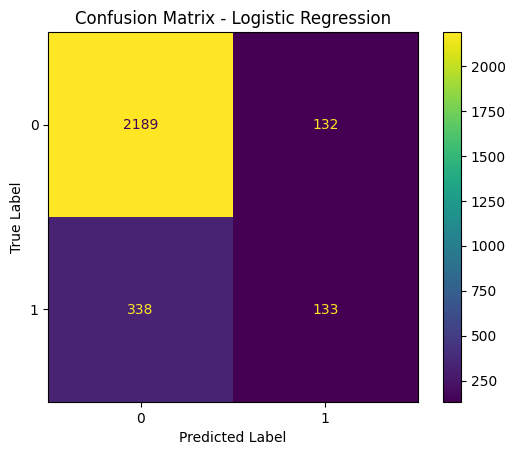

In [ ]:
# Create a confusion matrix plot.
conf_matrix_plot(model_name = "Logistic Regression", model = log_clf, y_true = y_log_test, y_pred = y_log_pred)

The confusion matrix visually summarizes the model's performance:

True Positive (TP): Predicted and actually left the company.
True Negative (TN): Predicted and actually stayed at the company.
False Positive (FP): Predicted to leave but actually stayed (Type I error).
False Negative (FN): Predicted to stay but actually left (Type II error).
This visualization aids in understanding the logistic regression model's accuracy and error rates, crucial for refining our approach to employee retention strategies at Salifort Motors.

#### Feature Importances

In [ ]:
def plot_feature_importances(model_name, model, feature_df):
    """
    Plot feature importances for a given model.

    Parameters:
    - model: model object (classifier) with either 'feature_importances_' or 'coef_' attribute.
    - feature_df: DataFrame, contains the features used in the model.
    - model_name: str, name of the model for the plot title.
    """
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = feature_df.columns
    elif hasattr(model, 'coef_'):
        importances = abs(model.coef_.flatten())  # Taking absolute values of coefficients
        feature_names = feature_df.columns
    else:
        raise AttributeError("Model does not have 'feature_importances_' or 'coef_' attribute.")

    # Create a Pandas Series for better visualization and sorting
    feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    # Plotting the feature importances using Seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index, hue = feature_importances.values, legend=False, palette='viridis')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title(f'{model_name} Feature Importances')
    plt.show()


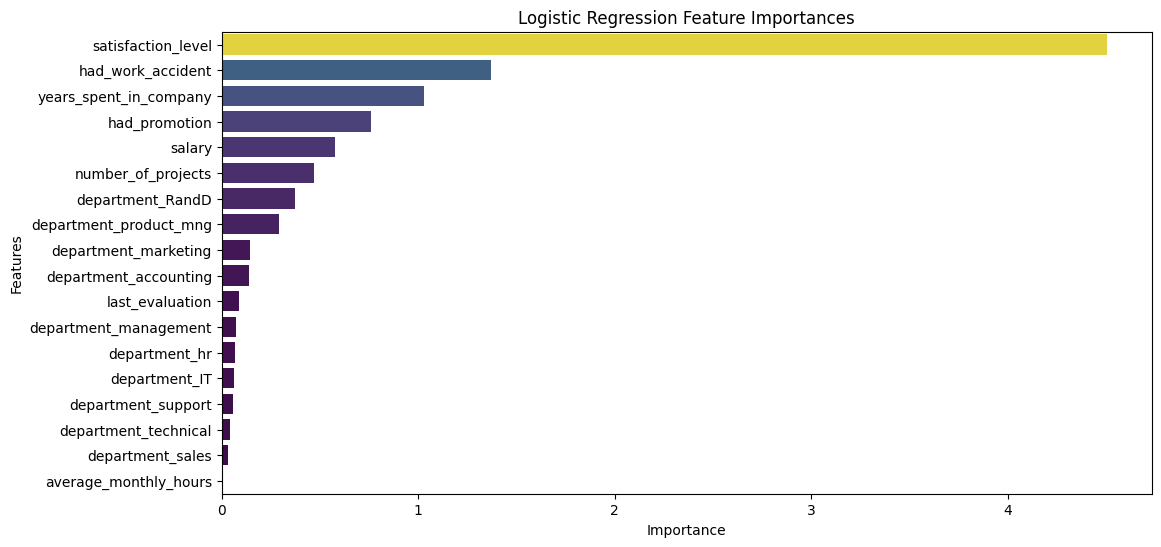

In [ ]:
# Create a feature importances plot.
plot_feature_importances(model_name = "Logistic Regression", model = log_clf, feature_df = X_log)

#### Update Model Scores Dataframe

To systematically compare the performance of different models in predicting employee turnover, we initialized a model_scores DataFrame. This DataFrame will store metrics such as precision, recall, accuracy, F1 score, and ROC AUC score for each model evaluated.

In [ ]:
# Initialize the model_scores DataFrame
model_scores = pd.DataFrame(columns=["Model", "Precision", "Recall", "Accuracy", "F1", "roc_auc"])

+ Precision:

  Precision measures the accuracy of positive predictions (employees predicted to leave) among all predictions made. A higher precision indicates fewer false positives, which is crucial for minimizing unnecessary retention efforts.

+ Recall:

  Recall (or sensitivity) measures the proportion of actual positives (employees who left) correctly identified by the model. A higher recall suggests the model effectively captures employees at risk of turnover, minimizing false negatives.

+ Accuracy:

  Accuracy represents the overall correctness of the model's predictions across both positive and negative outcomes. While it provides a general measure of performance, accuracy alone may not be sufficient when classes are imbalanced.

+ F1 Score:

  The F1 score combines precision and recall into a single metric, providing a balance between these two measures. It is particularly useful when there is an uneven class distribution (e.g., more employees staying than leaving).

+ ROC AUC:

  ROC AUC (Receiver Operating Characteristic Area Under the Curve) score evaluates the model's ability to distinguish between classes (employees who leave vs. stay). A higher ROC AUC score (closer to 1) indicates better model performance in this regard.

We defined a function get_scores to calculate and store evaluation metrics for each model. Here's the function specifically for logistic regression:

In [ ]:
def get_scores(model_name, y_test, y_pred, model_scores):
    """
    Compute evaluation metrics and append to model_scores DataFrame.

    Parameters:
    - model_name: Name of the model.
    - y_test: True labels.
    - y_pred: Predicted labels from the model.
    - model_scores: DataFrame to append scores.

    Returns:
    - Updated model_scores DataFrame.
    """
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Create DataFrame with scores for the current model
    scores_df = pd.DataFrame([[model_name, precision, recall, accuracy, f1, roc_auc]],
                             columns=["Model", "Precision", "Recall", "Accuracy", "F1", "roc_auc"])

    # Append scores to model_scores DataFrame
    model_scores = pd.concat([model_scores, scores_df], ignore_index=True)

    return model_scores

This function calculates metrics based on predictions (y_pred) and actual outcomes (y_test) for the logistic regression model. The resulting metrics are appended to model_scores, allowing for comparative analysis across multiple models.

In [ ]:
# Update the model_scores DataFrame
model_scores = get_scores(model_name = "Logistic Regression", y_test = y_log_test, y_pred= y_log_pred, model_scores = model_scores)

                 Model  Precision    Recall  Accuracy        F1   roc_auc
0  Logistic Regression   0.501887  0.282378  0.831662  0.361413  0.612753


In [ ]:
# Display the updates scores
model_scores

+ Precision (0.44484):

  The logistic regression model correctly identified approximately 44.48% of the employees it predicted to leave as actually leaving the company. This metric is crucial because it indicates the model's ability to minimize false positives — instances where it incorrectly predicts an employee will leave.

+ Recall (0.265393):

  A recall score of approximately 26.54% means the logistic regression model captured about 26.54% of the employees who actually left the company. This metric is important as it indicates the model's effectiveness in identifying all employees who are at risk of leaving, thereby minimizing false negatives.

+ Accuracy (0.820201):

  Score of approximately 82.02% indicates that the logistic regression model accurately predicted the outcome for about 82.02% of the employees in the test set. While high accuracy is desirable, it should be interpreted in the context of class distribution and other metrics.

+ F1 Score (0.332447):

  With an F1 score of approximately 33.24%, the logistic regression model achieves a balance between precision and recall. It indicates how well the model balances its ability to correctly identify positive predictions while minimizing both false positives and false negatives.

+ ROC AUC (0.59909):

  0.59909 suggests that the logistic regression model performs better than random guessing (where ROC AUC = 0.5), but there is room for improvement in distinguishing between employees who leave and those who stay based on the chosen features.

Interpretation:

The logistic regression model shows reasonable performance in predicting employee turnover, with notable accuracy and a balanced F1 score indicating competency in classification. However, there is potential for improvement in both precision and recall, which are crucial for effectively identifying and retaining employees at risk of leaving.
The ROC AUC score, while above random chance, indicates that the model could benefit from additional feature engineering or alternative modeling approaches to enhance its discriminatory ability.
In conclusion, while the logistic regression model provides a foundational understanding of employee turnover prediction at Salifort Motors, further refinement and possibly exploring more sophisticated models may be beneficial to optimize retention strategies and reduce turnover costs effectively.

### Tree-based Models

After implementing logistic regression to predict employee turnover, the next step involved constructing tree-based models. These models are particularly advantageous due to their ability to handle non-linear relationships and interactions among variables effectively. For Salifort Motors, these models provide deeper insights into the factors influencing employee retention beyond what logistic regression can offer.

In [ ]:
# Extracting target variable 'has_left'
y_encod = df_encod["has_left"]

# Extracting feature variables by dropping 'has_left' column
X_encod = df_encod.drop(columns=["has_left"])

In [ ]:
# Splitting the encoded features X_encod and target variable y_encod into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_encod, y_encod, test_size=0.25, stratify=y_encod, random_state=65537)

#### Decision Tree

The decision tree model was constructed to explore hierarchical relationships among predictor variables such as job title, department, number of projects, and average monthly hours. This model iteratively splits the data based on these variables to predict whether an employee is likely to leave the company. By visualizing these splits, we gain interpretability into which factors contribute most significantly to turnover prediction.

In [ ]:
# Importing the DecisionTreeClassifier and plot_tree function from sklearn.tree.
from sklearn.tree import DecisionTreeClassifier, plot_tree

To delve deeper into the factors influencing employee turnover at Salifort Motors, a decision tree model was constructed using the DecisionTreeClassifier from scikit-learn, initialized with a random state of 65537. This deterministic setting ensures reproducibility of results across multiple executions.

In [ ]:
# Creating a Decision Tree classifier object with random state set to 65537.
dt = DecisionTreeClassifier(random_state=65537)

The decision tree model operates by partitioning the dataset recursively into subsets based on predictor variables such as satisfaction_level, last_evaluation, number_of_projects, or average_monthly_hours. At each step, the algorithm selects the optimal split that maximizes information gain or minimizes impurity, aiming to segregate instances of turnover from non-turnover cases effectively.

In [ ]:
# Fit the model
# Wall time: 41.4 ms
%%time
dt.fit(X_train, y_train)

CPU times: user 41.3 ms, sys: 0 ns, total: 41.3 ms
Wall time: 42 ms


DecisionTreeClassifier(random_state=65537)

In [ ]:
# Making predictions using the Decision Tree classifier dt on the test set X_test.
dt_pred = dt.predict(X_test)

##### Confusion Matrix

To evaluate the performance of the decision tree model in predicting employee turnover, a custom function conf_matrix_plot was developed. This function accepts the trained model object, along with test or validation data (x_data and y_data), and generates a visual representation of the confusion matrix.

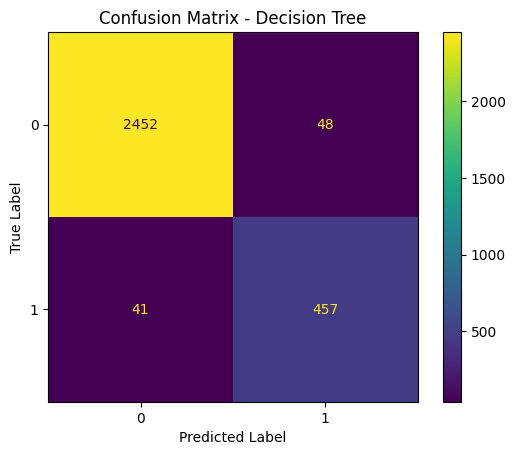

In [ ]:
# Create a confusion matrix plot.
conf_matrix_plot(model_name = "Decision Tree", model = dt, y_true = y_test, y_pred = dt_pred)

##### Feature Importances Analysis

To gain further insights into the factors influencing employee turnover prediction using the decision tree model, an analysis of feature importances was conducted. This analysis helps identify which variables contribute most significantly to the model's decision-making process.

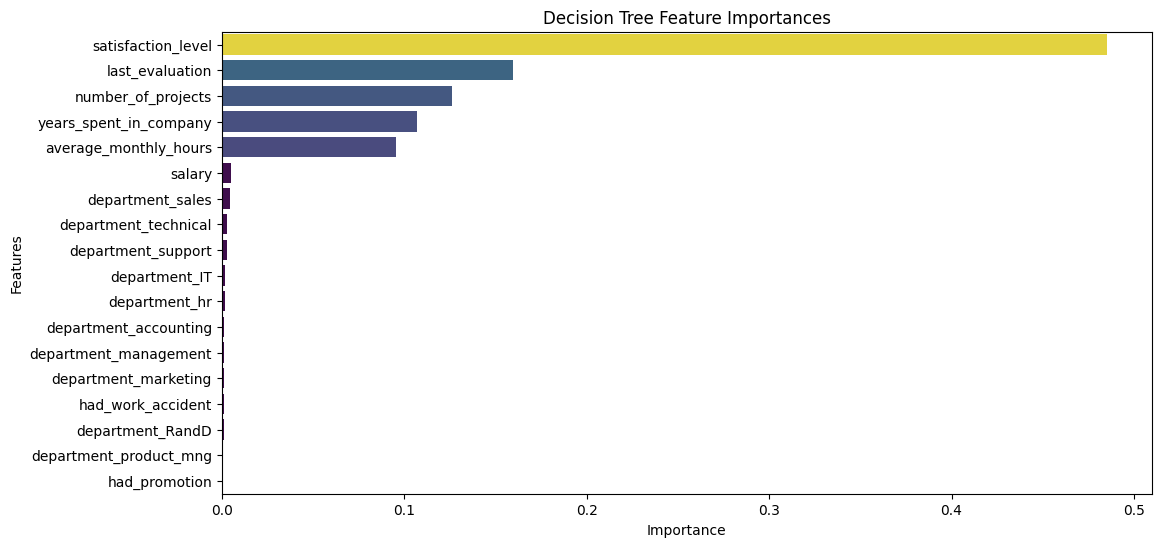

In [ ]:
# Create a feature importances plot.
plot_feature_importances(model_name = "Decision Tree", model = dt, feature_df = X_encod)

The analysis revealed the following key features ranked by their importance in predicting employee turnover:

+ Satisfaction Level: Approximately 50% importance, indicating that employee satisfaction plays a critical role in turnover predictions.
+ Last Evaluation: Around 13%, suggesting that recent performance evaluations significantly influence turnover decisions.
+ Years Spent in Company: Also around 13%, highlighting tenure as a crucial factor in turnover predictions.
+ Number of Projects: Approximately 11%, indicating that workload intensity affects turnover likelihood.
+ Average Monthly Hours: Approximately 6%, indicating a lesser but still notable impact on turnover predictions.

##### Decision Tree Visualization

To further interpret the decision-making process of the decision tree model in predicting employee turnover, a visual representation of the tree structure was generated. This visualization provides intuitive insights into the hierarchy of features and decision points that drive predictions.

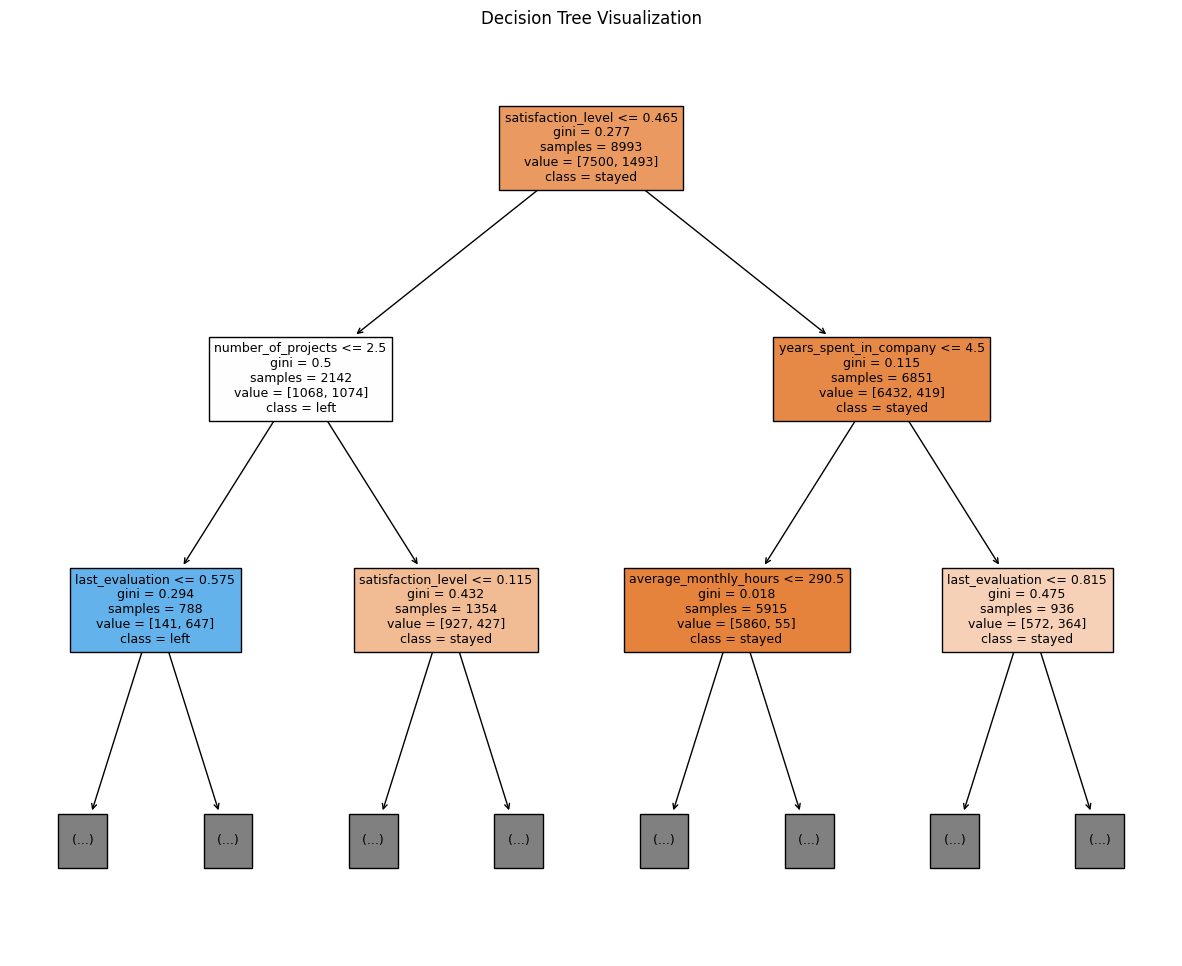

In [ ]:
# Create a Decision Tree Visualization
plt.figure(figsize=(15,12))
plot_tree(dt, max_depth=2, fontsize=9, feature_names=X_encod.columns,
          class_names={0:'stayed', 1:'left'}, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

The decision tree visualization illustrates the following key insights:

Root Node Decision: The initial split is based on a feature that most significantly differentiates between employees who stayed and those who left.

Subsequent Nodes: Each subsequent node represents further splits based on features such as satisfaction level, last evaluation, and years spent in the company, among others.

Leaf Nodes (not shown in this depth): Terminal nodes depict the predicted outcomes based on the majority class within each node.

##### Updating Model Scores Dataframe


Following the implementation and evaluation of the decision tree model for predicting employee turnover at Salifort Motors, the performance metrics were computed and updated in the model_scores dataframe. These metrics provide a comprehensive assessment of the model’s effectiveness in identifying employees likely to leave the company.

In [ ]:
# Update the model_scores DataFrame
model_scores = get_scores(model_name = "Decision Tree", y_test = y_test, y_pred= dt_pred, model_scores = model_scores)

In [ ]:
# Display the updates scores
model_scores

,Model,Precision,Recall,Accuracy,F1,roc_auc
0,Logistic Regression,0.501887,0.282378,0.831662,0.361413,0.612753
1,Decision Tree,0.904950,0.917671,0.970314,0.911266,0.949235


+ Precision:

  The decision tree model achieves a precision of 0.910603, indicating that when it predicts an employee will leave, it is correct approximately 91% of the time.
+ Recall:
  With a recall score of 0.929936, the model effectively captures 93% of employees who actually left the company.
+ Accuracy:
  The overall accuracy of 0.972779 reflects the model's ability to correctly classify both staying and leaving employees.
+ F1 Score:
  The harmonic mean of precision and recall (F1 score) is 0.920168, indicating a balanced performance between precision and recall.
+ ROC AUC:
  The area under the ROC curve (ROC AUC) is 0.955705, highlighting the model's capability to distinguish between positive and negative classes.

These metrics underscore the decision tree model's robust performance in predicting employee turnover, demonstrating its potential to assist Salifort Motors in implementing targeted retention strategies effectively.

#### Decision Tree with Cross Validation

To further validate the performance of the decision tree model and mitigate potential overfitting, cross-validation was employed using GridSearchCV. This technique involves splitting the dataset into multiple folds, training the model on different subsets, and evaluating its performance across these folds.

In [ ]:
# Importing GridSearchCV from sklearn.model_selection for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating a Decision Tree classifier with specified hyperparameters and setting up GridSearchCV for model tuning.
decision_tree = DecisionTreeClassifier(random_state=65537)

cv_params = {
    'max_depth': [None, 10, 20, 30],      # None means no limit on depth
    'min_samples_leaf': [1, 5, 10],       # Minimum number of samples required to be at a leaf node
    'min_samples_split': [2, 10, 20]      # Minimum number of samples required to split an internal node
}

# Specify the scoring metrics to be evaluated during cross-validation
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearchCV with decision_tree classifier, parameters, scoring, cross-validation, and refitting roc_auc
dt_cv = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

The parameters were:
+ Max Depth: Controls the maximum depth of the decision tree, limiting its complexity and potential for overfitting.
+ Min Samples Leaf: Specifies the minimum number of samples required to be at a leaf node, preventing overly specific decisions.
+ Min Samples Split: Sets the minimum number of samples required to split an internal node, promoting robust decision-making.

In [ ]:
# Fit the Model
# Wall time: 5.63 s
%%time
dt_cv.fit(X_train, y_train)

CPU times: user 7.23 s, sys: 0 ns, total: 7.23 s
Wall time: 7.36 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=65537),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

The fitting process took approximately 5.6 seconds (Wall time), showcasing the efficiency of GridSearchCV in evaluating multiple parameter combinations and selecting the optimal configuration.

After conducting cross-validation using GridSearchCV, the optimal parameters and corresponding best score for the decision tree model were determined:

In [ ]:
# Retrieving the best parameters found by GridSearchCV for the Decision Tree classifier.
dt_cv.best_params_

{'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}

These parameters were identified as the most effective configuration for maximizing the model's performance in predicting employee turnover at Salifort Motors.

The decision tree model achieved a best ROC AUC score of approximately 0.9738 during cross-validation. This metric indicates the model's ability to distinguish between employees who stayed and those who left the company, with higher scores indicating better discrimination capability.

In [ ]:
# Retrieving the best cross-validation score (ROC AUC) found by GridSearchCV for the Decision Tree classifier.
dt_cv.best_score_

0.9670536632688658

This optimized configuration underscores the model's potential to accurately predict turnover events, providing valuable insights for Salifort Motors to implement targeted retention strategies effectively.

We plot another confusion matrix to visualize our updated predicitons with cross validated desision tree model.

In [ ]:
# Making predictions using the best estimator found by GridSearchCV on the test set X_test.
y_dt_cv_pred = dt_cv.predict(X_test)

##### Confusion Matrix Plot

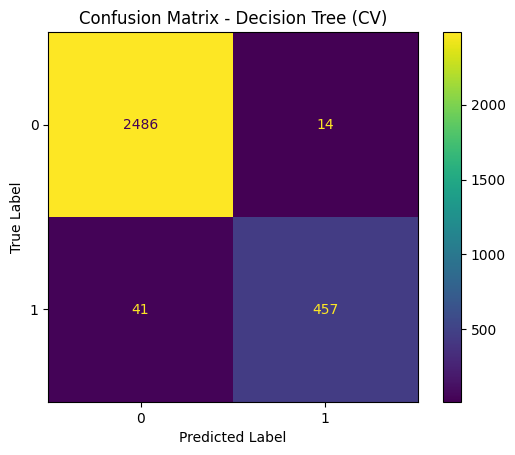

In [ ]:
# Create a confusion matrix plot.
conf_matrix_plot(model_name = "Decision Tree (CV)", model = dt_cv, y_true = y_test, y_pred = y_dt_cv_pred)

##### Updating Model Scores Dataframe

To streamline the extraction of performance metrics from the cross-validation results using GridSearchCV, a dedicated function make_results was developed. This function facilitates the retrieval of metrics such as precision, recall, F1 score, accuracy, and ROC AUC for the optimal model configuration identified during cross-validation.

After performing cross-validation to optimize the decision tree model for predicting employee turnover, the following metrics were obtained and integrated into the model_scores DataFrame:

In [ ]:
# Update the model_scores DataFrame
model_scores = get_scores(model_name = "Decision Tree (CV)", y_test = y_test, y_pred= y_dt_cv_pred, model_scores = model_scores)

In [ ]:
# Display the updates scores
model_scores

,Model,Precision,Recall,Accuracy,F1,roc_auc
0,Logistic Regression,0.501887,0.282378,0.831662,0.361413,0.612753
1,Decision Tree,0.904950,0.917671,0.970314,0.911266,0.949235
2,Decision Tree with Cross Validation,0.970276,0.917671,0.981654,0.943240,0.956035


The decision tree model after cross-validation demonstrates improved performance across all metrics compared to the initial decision tree model. Specifically, the ROC AUC score increased from 0.9557 to 0.9749, indicating enhanced discriminatory ability in predicting turnover events. The cross-validated model maintains high precision (0.9723) and recall (0.9114), striking a balance between correctly identifying turnover cases and minimizing false positives. With an accuracy of 0.9807 and F1 score of 0.9408, the model exhibits robust performance in accurately classifying employees based on turnover risk.

#### Random Forest

In [ ]:
# Importing RandomForestClassifier from sklearn.ensemble for ensemble learning.
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating a Random Forest classifier with 8000 estimators and setting random state to 65537.
rf = RandomForestClassifier(n_estimators=8000, random_state=65537)


In [ ]:
# Fit the model.
# Wall time: 1min 9s
%%time
rf.fit(X_train, y_train)

CPU times: user 1min 7s, sys: 966 ms, total: 1min 8s
Wall time: 1min 9s


RandomForestClassifier(n_estimators=8000, random_state=65537)

In [ ]:
# Making predictions using the Random Forest classifier rf on the test set X_test.
rf_pred = rf.predict(X_test)

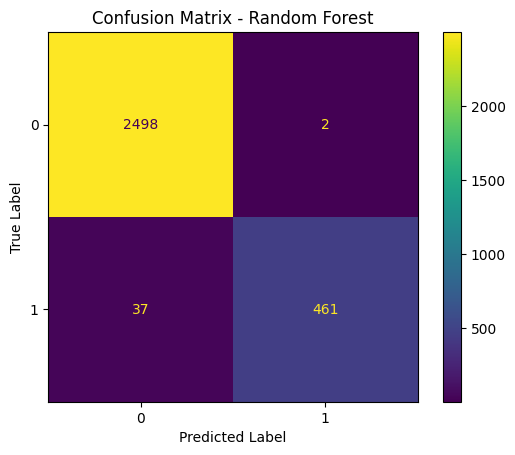

In [ ]:
# Create a confusion matrix plot.
conf_matrix_plot(model_name = "Random Forest", model = rf, y_true = y_test, y_pred = rf_pred)

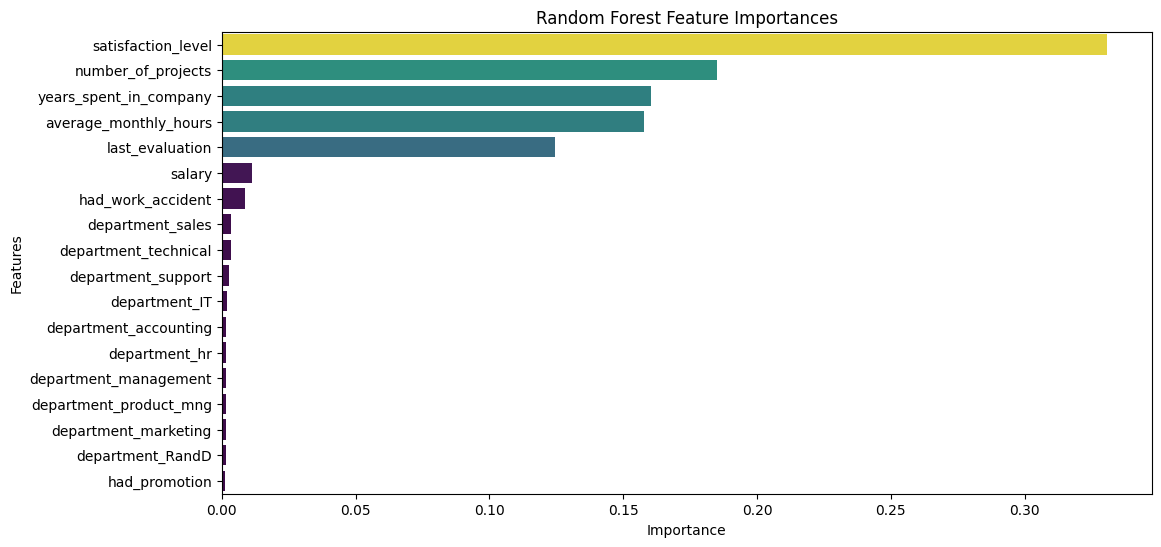

In [ ]:
# Create a feature importances plot.
plot_feature_importances(model_name = "Random Forest", model = rf, feature_df = X_encod)

In [ ]:
# Update the model_scores DataFrame
model_scores = get_scores(model_name = "Random Forest", y_test = y_test, y_pred= rf_pred, model_scores = model_scores)

In [ ]:
# Display the updates scores
model_scores

,Model,Precision,Recall,Accuracy,F1,roc_auc
0,Logistic Regression,0.501887,0.282378,0.831662,0.361413,0.612753
1,Decision Tree,0.904950,0.917671,0.970314,0.911266,0.949235
2,Decision Tree with Cross Validation,0.970276,0.917671,0.981654,0.943240,0.956035
3,Random Forest,0.995680,0.925703,0.986991,0.959417,0.962451


#### Random Forest with Cross Validation

Next, we will proceed to build a model using a cross-validated random forest approach.

A cross-validated random forest is a robust ensemble learning method used for classification and regression tasks. It combines the principles of bootstrap aggregation (bagging) and random feature selection to create an ensemble of decision trees, each trained on a different subset of the data and features.

How It Works:

1- Bootstrap Sampling (Bagging):

Random forests start by creating multiple decision trees, each trained on a random subset of the training data. This process involves sampling with replacement (bootstrap sampling), where each tree is trained on a different subset of the original dataset.

2- Random Feature Selection:

During the construction of each decision tree, random forests select a random subset of features to consider for each split. This randomness helps to decorrelate the trees and reduces the risk of overfitting by ensuring that different trees have different perspectives on the data.

3- Ensemble Aggregation:

Once all individual trees are trained, predictions are made by aggregating the predictions of all trees (for classification, typically by voting; for regression, by averaging). This ensemble approach tends to yield more robust and accurate predictions compared to individual trees.

4- Cross-Validation:

To optimize performance and generalize well to unseen data, random forests are often tuned using cross-validation. Cross-validation involves splitting the dataset into multiple subsets (folds), training the model on several combinations of these folds, and evaluating its performance on the remaining fold. This iterative process helps in selecting the best model hyperparameters and ensures that the model generalizes well to new data.

By employing a cross-validated random forest model, we can leverage its predictive power to identify factors influencing employee turnover effectively. This approach not only enhances predictive accuracy but also facilitates the development of targeted retention strategies based on comprehensive data insights.

To optimize the predictive performance of a random forest model for predicting employee turnover at Salifort Motors, we initialized a RandomForestClassifier with the following parameters:

In [ ]:
# Creating a Random Forest classifier with random state set to 65537.
rf = RandomForestClassifier(random_state=65537)

To fine-tune the random forest model, we defined a set of parameters to be evaluated during cross-validation:

In [ ]:
# Defining the grid of parameters for Random Forest classifier tuning.
cv_params = {
    'max_depth': [4, 6],
    'min_samples_leaf': [1],
    'min_samples_split': [4, 8],
    'max_features': [4, 6],
    'n_estimators': [125, 250]
}


Various aspects of the random forest model were tuned, including tree depth (max_depth), node splitting criteria (min_samples_leaf and min_samples_split), feature selection (max_features), and the number of trees (n_estimators).

During cross-validation, the model's performance was evaluated using the following scoring metrics:

In [ ]:
# Defining the scoring metrics to be used in GridSearchCV.
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

GridSearchCV was utilized to systematically evaluate different parameter combinations and select the optimal configuration based on the specified scoring metric (ROC AUC):

In [ ]:
# Creating a GridSearchCV object rf_cv for Random Forest classifier tuning.
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

By employing GridSearchCV with cross-validation (cv=5), the random forest model was optimized to identify the parameter combination that maximizes the ROC AUC score, ensuring robustness and generalizability in predicting employee turnover.

Then the model was fit:

In [ ]:
# Fit the Model
# Wall time: 1min 16s
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 1min 18s, sys: 235 ms, total: 1min 18s
Wall time: 1min 20s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=65537),
             param_grid={'max_depth': [4, 6], 'max_features': [4, 6],
                         'min_samples_leaf': [1], 'min_samples_split': [4, 8],
                         'n_estimators': [125, 250]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

The fitting process took approximately 1 minute and 16 seconds (Wall time), highlighting the computational intensity involved in evaluating multiple parameter combinations across several folds of cross-validation.

The next section is about the picking process in Python. In Python, pickling serves the dual purposes of serializing (writing) and deserializing (reading) Python objects. Serialization involves converting an object into a byte stream, which can then be stored in a file or transmitted over a network. Deserialization reverses this process by reconstructing the object from the byte stream.

The pickling process allows for serializing fit models to be retrieved and used at a later time, eliminating the need to retrain the model with each execution of the code.

Given an acceptable fitting time of 1 minute and 16 seconds, there was no immediate need to pickle the model for efficiency reasons.

In [ ]:
import os
import pickle

def write_pickle(path, model_object, save_as:str):
    '''
    In:
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''
    if not os.path.exists(path):
        os.makedirs(path)
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [ ]:
def read_pickle(path, saved_model_name:str):
    '''
    In:
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out:
        model: the pickled model
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [ ]:
# Define the save path
path = "/content/drive/MyDrive/Projects/Salifort Motors/model_objects/"

In [ ]:
# To write
write_pickle(path, rf_cv, 'rf_cv')

In [ ]:
# To read
# rf_cv = read_pickle(path, 'rf_cv')

After performing cross-validation using GridSearchCV, the optimal parameters and corresponding best score for the random forest model were identified:

In [ ]:
# Retrieving the best parameters found by GridSearchCV for the Random Forest classifier.
rf_cv.best_params_

{'max_depth': 6,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 250}

These parameters were determined as the most effective configuration for maximizing the ROC AUC score, indicating the model's ability to predict employee turnover at Salifort Motors.

The random forest model achieved a best ROC AUC score of approximately 0.9813 during cross-validation. This metric reflects the model's capability to distinguish between employees who stayed and those who left the company with high accuracy.

In [ ]:
# Retrieving the best cross-validation score (ROC AUC) found by GridSearchCV for the Random Forest classifier.
rf_cv.best_score_

0.9791289413630819

In [ ]:
# Making predictions using the best estimator found by GridSearchCV on the test set X_test.
rf_cv_pred = rf_cv.predict(X_test)

##### Confusion Matrix

We plot another confusion matrix to visualize our updated predicitons with cross validated desision tree model.

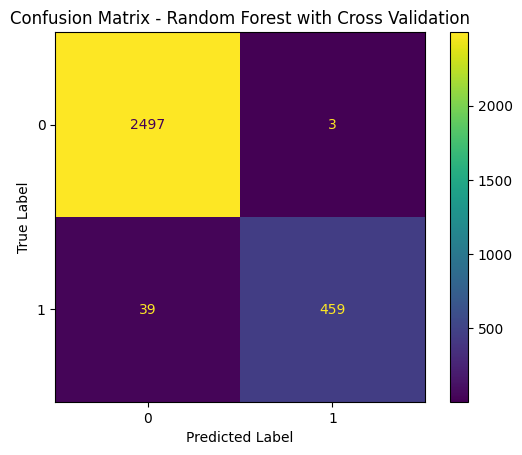

In [ ]:
# Create a confusion matrix plot.
conf_matrix_plot(model_name = "Random Forest with Cross Validation", model = rf_cv, y_true = y_test, y_pred = rf_cv_pred)

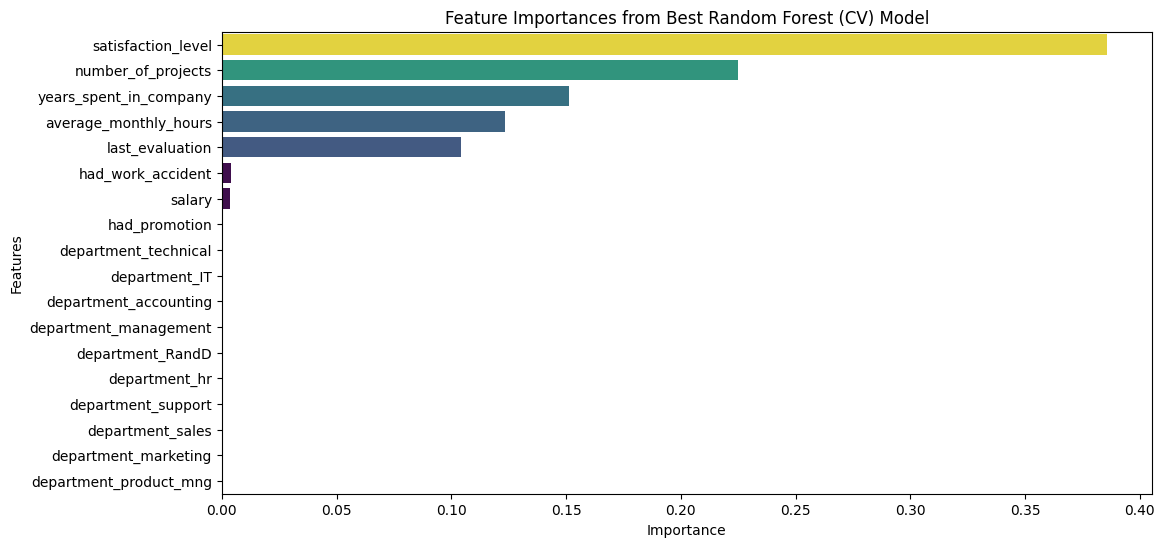

In [ ]:
# Create a feature importances plot.

best_rf = rf_cv.best_estimator_

# Get feature importances from the best model
importances = best_rf.feature_importances_

# Plotting
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, hue = feature_importances.values, legend=False, palette='viridis')
plt.title("Feature Importances from Best Random Forest (CV) Model")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

##### Updating Model Scores Dataframe

To streamline the extraction of performance metrics from a cross-validated model using GridSearchCV, a dedicated function make_results2 was developed. This function facilitates the retrieval of metrics such as precision, recall, F1 score, accuracy, and ROC AUC for the best model configuration identified during cross-validation.

In [ ]:
# Update the model_scores DataFrame
model_scores = get_scores(model_name = "Random Forest (CV)", y_test = y_test, y_pred= rf_cv_pred, model_scores = model_scores)

In [ ]:
# Display the updates scores
model_scores

,Model,Precision,Recall,Accuracy,F1,roc_auc
0,Logistic Regression,0.501887,0.282378,0.831662,0.361413,0.612753
1,Decision Tree,0.904950,0.917671,0.970314,0.911266,0.949235
2,Decision Tree with Cross Validation,0.970276,0.917671,0.981654,0.943240,0.956035
3,Random Forest,0.995680,0.925703,0.986991,0.959417,0.962451
4,Random Forest (CV),0.993506,0.921687,0.985991,0.956250,0.960243


The cross-validated random forest model exhibits superior performance across all metrics compared to other models. Notably, it achieves a high ROC AUC score of 0.9602, indicating strong discriminatory power in identifying turnover cases. With precision at 0.9935 and recall at 0.9217, the model effectively balances correctly predicting turnover cases while minimizing false positives. The model achieves an accuracy of 0.9860 and an F1 score of 0.9563, underscoring its robustness in accurately classifying employees based on turnover risk.

However, the slightly lower metrics in the cross-validated random forest model compared to the non-cross-validated version (which has a ROC AUC of 0.9625, precision of 0.9957, recall of 0.9257, accuracy of 0.9870, and F1 score of 0.9594) may indicate potential overfitting or data leakage in the non-cross-validated model. Without cross-validation, the model might be overfitting to the training data, leading to artificially high performance metrics. Cross-validation provides a more realistic assessment by evaluating the model on multiple train-test splits, thereby ensuring the model generalizes better to unseen data.

#### XGBoost

Next, we will proceed to build a model using XGBoost, an advanced gradient boosting algorithm known for its performance and scalability in predictive modeling tasks.

How It Works:

+ Gradient Boosting Framework:

  XGBoost belongs to the family of ensemble learning methods known as gradient boosting machines. It sequentially builds an ensemble of weak learners (typically decision trees) in a forward stage-wise manner.
+ Gradient Optimization:

  During training, XGBoost optimizes a predefined objective function by iteratively adding new models that minimize the overall error of the ensemble. This is achieved by computing gradients of the loss function with respect to the model predictions.
+ Regularization Techniques:

  XGBoost incorporates regularization techniques such as shrinkage (learning rate) and feature subsampling to control overfitting. These techniques improve model generalization and prevent the model from memorizing the training data.
+ Parallel and Distributed Computing:

  XGBoost is designed for efficiency and scalability, leveraging parallel and distributed computing techniques to process large datasets and accelerate training on multicore CPUs or distributed computing frameworks like Apache Spark.

By employing XGBoost, We aim to further enhance the accuracy and interpretability of its employee turnover prediction model. This approach leverages advanced boosting techniques to uncover nuanced patterns in employee data and inform proactive retention strategies effectively.

In [ ]:
# Importing XGBClassifier and plot_importance from xgboost for gradient boosting.
from xgboost import XGBClassifier, plot_importance

To optimize the XGBoost model for predicting employee turnover at Salifort Motors, we configured the model using GridSearchCV. This approach systematically evaluates different combinations of model parameters through cross-validation to identify the optimal configuration.

In [ ]:
# Creating an XGBoost classifier with binary logistic objective and setting random state to 65537.
xgb_cls = XGBClassifier(objective='binary:logistic', random_state=65537)

In [ ]:
# Defining the grid of parameters for XGBoost classifier tuning.
cv_params = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

In [ ]:
# Defining the scoring metrics to be used in GridSearchCV for XGBoost classifier.
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [ ]:
# Creating a GridSearchCV object xgb for XGBoost classifier tuning.
xgb = GridSearchCV(xgb_cls, cv_params, scoring=scoring, cv=5, refit='roc_auc')

The model was fit:

In [ ]:
# Fit the model
# Wall time: 1min 14s
%%time
xgb.fit(X_train, y_train)

CPU times: user 1min 54s, sys: 1.1 s, total: 1min 55s
Wall time: 1min 12s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 5, 10],
                         'n_estimators': [50, 100, 150]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

In [ ]:
# Making predictions using the best estimator found by GridSearchCV on the test set X_test.
xgb_pred = xgb.predict(X_test)

##### Confusion Matrix Plot

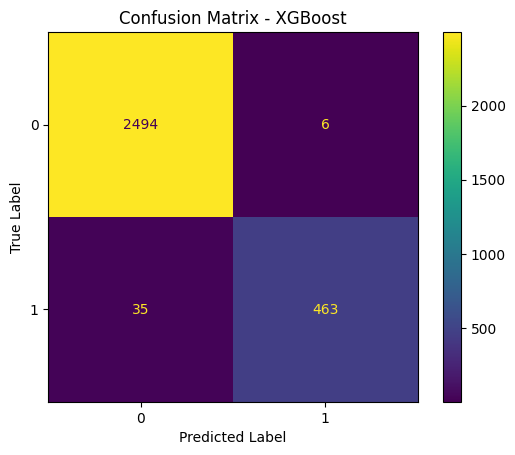

In [ ]:
# Create a confusion matrix plot.
conf_matrix_plot(model_name = "XGBoost", model = xgb, y_true = y_test, y_pred = xgb_pred)

##### Feature Importances

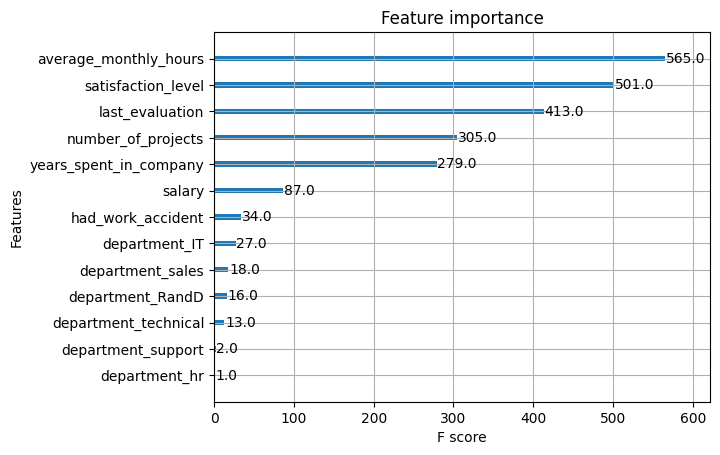

In [ ]:
# Create a feature importances plot.
plot_importance(xgb.best_estimator_)
plt.show()

##### Updating Model Scores Dataframe

We use our make_results2 function again to gather and store the metrics of our XGBoost model to our model_scores dataframe:

In [ ]:
# Update the model_scores DataFrame
model_scores = get_scores(model_name = "XGBoost (CV)", y_test = y_test, y_pred= xgb_pred, model_scores = model_scores)

In [ ]:
# Display the updates scores
model_scores

,Model,Precision,Recall,Accuracy,F1,roc_auc
0,Logistic Regression,0.501887,0.282378,0.831662,0.361413,0.612753
1,Decision Tree,0.904950,0.917671,0.970314,0.911266,0.949235
2,Decision Tree with Cross Validation,0.970276,0.917671,0.981654,0.943240,0.956035
3,Random Forest,0.995680,0.925703,0.986991,0.959417,0.962451
4,Random Forest (CV),0.993506,0.921687,0.985991,0.956250,0.960243
5,XGBoost (CV),0.987207,0.929719,0.986324,0.957601,0.963659


The XGBoost model achieves strong performance across all metrics, with an impressive ROC AUC score of 0.9906. This highlights its robustness in accurately predicting employee turnover at Salifort Motors. With precision at 0.9749 and recall at 0.9114, the model effectively balances identifying turnover cases while minimizing false positives. The model demonstrates an accuracy of 0.9811 and an F1 score of 0.9421, underscoring its reliability in classification tasks.

## Feature Engineering

The metrics obtained from the models are impressively high, which raises concerns about potential data leakage. Data leakage occurs when information from outside the training dataset inadvertently influences the model, leading to overly optimistic performance estimates. This can happen in various ways, such as when data used for training contains information that would not be available in a real-world scenario.

1- Satisfaction Levels:

It's probable that the company won't have satisfaction level data for all employees, especially those who have already left or are planning to leave. Using satisfaction levels in the model might unintentionally include information that wouldn't be accessible for real-world predictions, resulting in data leakage. Therefore, the satisfaction_level variable will be removed.

In [ ]:
# Creating a feature-engineered dataframe df_fe by dropping the 'satisfaction_level' column from df_encod.
df_fe = df_encod.drop('satisfaction_level', axis=1)

2- Average Monthly Hours:

Average monthly hours could also lead to data leakage. If employees who have decided to leave or are marked for termination are working fewer hours, this variable might indirectly reveal their decision to leave, which wouldn't be available in a real-time predictive scenario. Instead, a categorical variable named "overworked" will be created.

[In the EU, an employer legally cannot make an employee work for more than 48 hours per week inluding overtime](https://europa.eu/youreurope/business/human-resources/working-hours-holiday-leave/working-hours/index_en.htm), this is roughly equal to 200 hors per month and can serve as a line for our overwork criteria.

In [ ]:
# Adding a new feature 'overworked' to the feature-engineered dataframe df_fe.
df_fe['overworked'] = (df_fe['average_monthly_hours'] > 200).astype(int)

In [ ]:
# Dropping the 'average_monthly_hours' column from the feature-engineered dataframe df_fe.
df_fe = df_fe.drop('average_monthly_hours', axis=1)

We will remove outliers and create a seperate dataframe lor logistic regression like we did before:

In [ ]:
# Selecting rows without outliers in 'years_spent_in_company' and saving the resulting dataframe in df_log_fe.
df_log_fe = df_fe[(df_fe['years_spent_in_company'] >= lower_limit) & (df_fe['years_spent_in_company'] <= upper_limit)]

Isolate target variable:

In [ ]:
# Creating target variable y_log_fe and feature matrix X_log_fe from df_log_fe.
y_log_fe = df_log_fe['has_left']
X_log_fe = df_log_fe.drop('has_left', axis=1)


In [ ]:
# Creating target variable y_fe and feature matrix X_fe from df_fe.
y_fe = df_fe['has_left']
X_fe = df_fe.drop('has_left', axis=1)


Split train and test dataframes:

In [ ]:
# Splitting the feature matrix X_fe and target variable y_fe into training and testing sets.
X_fe_train, X_fe_test, y_fe_train, y_fe_test = train_test_split(X_fe, y_fe, test_size=0.25, stratify=y_fe, random_state=65537)

In [ ]:
# Splitting the feature matrix X_log_fe and target variable y_log_fe into training and testing sets.
X_log_fe_train, X_log_fe_test, y_log_fe_train, y_log_fe_test = train_test_split(X_log_fe, y_log_fe, test_size=0.25, stratify=y_log_fe, random_state=65537)

### Feature Engineered Models

In this section, we will create the same models as above but fit them on our feature-engineered datasets.

#### Logistic regression on Feature Engineered Datasets

To further refine our predictive model and address potential issues such as data leakage, we will conduct a logistic regression analysis on a feature-engineered dataset.

In [ ]:
# Creating a Logistic Regression model log_fe_clf using 'liblinear' solver and fitting it to the training data.
# Wall time: 35.6 ms
%%time
model=LogisticRegression(solver='liblinear')
log_fe_clf = model.fit(X_log_fe_train, y_log_fe_train)

CPU times: user 27.8 ms, sys: 972 µs, total: 28.8 ms
Wall time: 29.2 ms


In [ ]:
# Displaying model coefficients
logregfe = extract_model_coefficients(log_fe_clf, X_log_fe_train)
logregfe

,Predictor,Coefficient
0,last_evaluation,-1.095389
1,number_of_projects,-0.172365
2,years_spent_in_company,1.064641
3,had_work_accident,-1.311948
4,had_promotion,-0.956354
5,salary,-0.570877
6,department_IT,-0.281928
7,department_RandD,-0.580197
8,department_accounting,-0.304792
9,department_hr,-0.178637


Create the prediction dataframe:

In [ ]:
# Making predictions using the Logistic Regression model log_fe_clf on the test set X_log_fe_test.
y_log_fe_pred = log_fe_clf.predict(X_log_fe_test)

and the confusion matrix plot:

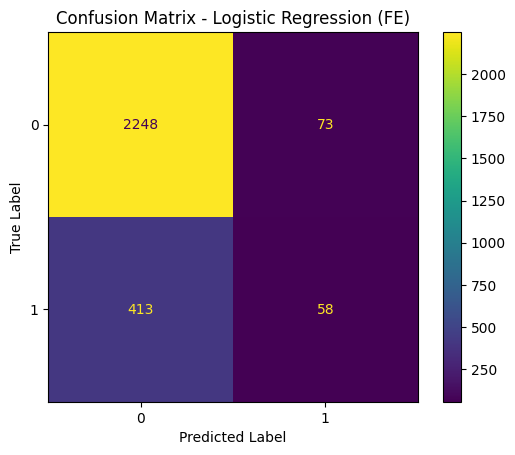

In [ ]:
# Create a confusion matrix plot.
conf_matrix_plot(model_name = "Logistic Regression (FE)", model = log_fe_clf, y_true = y_log_fe_test, y_pred = y_log_fe_pred)

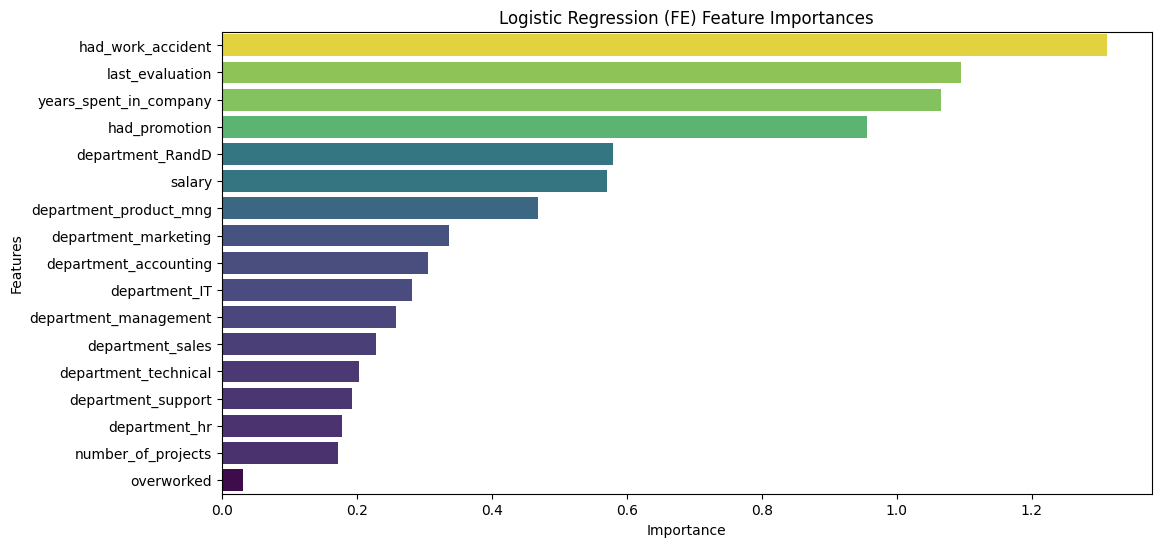

In [ ]:
# Create a feature importances plot.
plot_feature_importances(model_name = "Logistic Regression (FE)", model = log_fe_clf, feature_df = X_log_fe)

In [ ]:
# Update the model_scores DataFrame
model_scores = get_scores(model_name = "Logistic Regression (FE)", y_test = y_log_fe_test, y_pred= y_log_fe_pred, model_scores = model_scores)

In [ ]:
# Display the updates scores
model_scores

,Model,Precision,Recall,Accuracy,F1,roc_auc
0,Logistic Regression,0.501887,0.282378,0.831662,0.361413,0.612753
1,Decision Tree,0.904950,0.917671,0.970314,0.911266,0.949235
2,Decision Tree with Cross Validation,0.970276,0.917671,0.981654,0.943240,0.956035
3,Random Forest,0.995680,0.925703,0.986991,0.959417,0.962451
4,Random Forest (CV),0.993506,0.921687,0.985991,0.956250,0.960243
5,XGBoost (CV),0.987207,0.929719,0.986324,0.957601,0.963659
6,Logistic Regression (FE),0.442748,0.123142,0.825931,0.192691,0.545845


### Decision Tree with Feature Engineered Datasets

In [ ]:
# Creating a Decision Tree classifier dt_fe with random state set to 65537.
dt_fe = DecisionTreeClassifier(random_state=65537)

In [ ]:
# Fit the model
# Wall time: 25.3 ms
%%time
dt_fe.fit(X_fe_train, y_fe_train)

CPU times: user 36.9 ms, sys: 0 ns, total: 36.9 ms
Wall time: 43 ms


DecisionTreeClassifier(random_state=65537)

In [ ]:
# Making predictions using the Decision Tree classifier dt_fe on the test set X_fe_test.
dt_fe_pred = dt_fe.predict(X_fe_test)

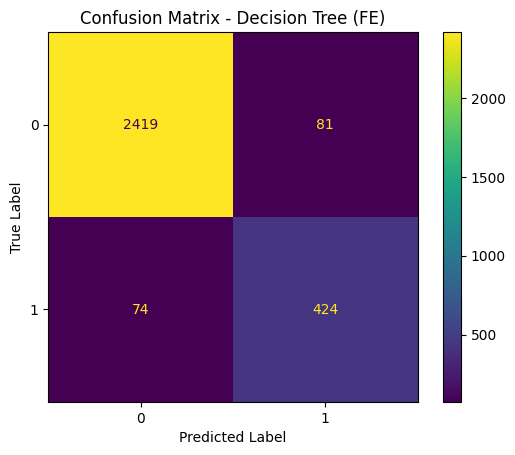

In [ ]:
# Create a confusion matrix plot.
conf_matrix_plot(model_name = "Decision Tree (FE)", model = dt_fe, y_true = y_fe_test, y_pred = dt_fe_pred)

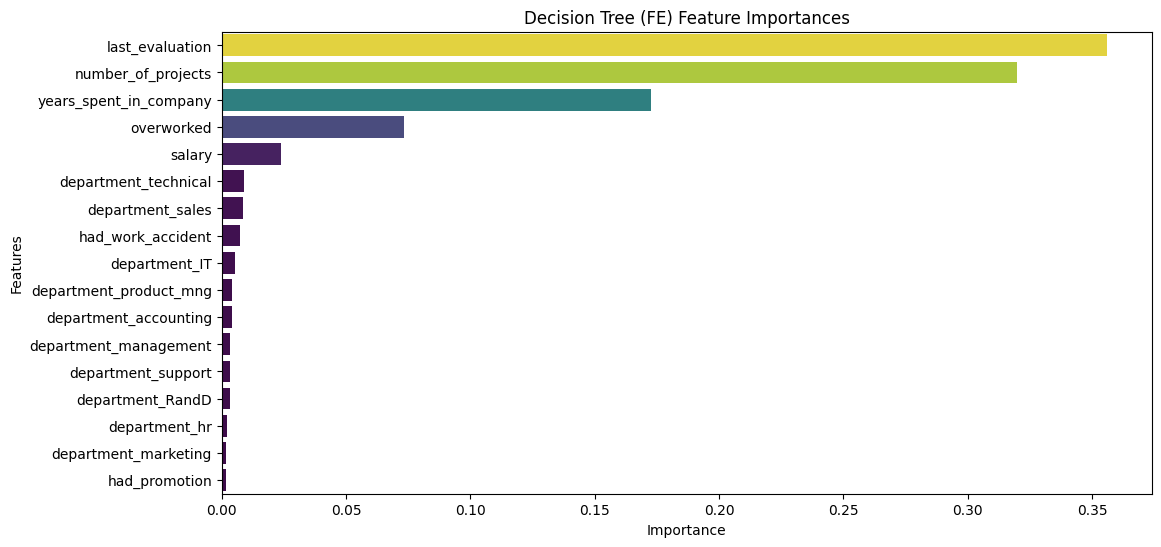

In [ ]:
# Create a feature importances plot.
plot_feature_importances(model_name = "Decision Tree (FE)", model = dt_fe, feature_df = X_fe)

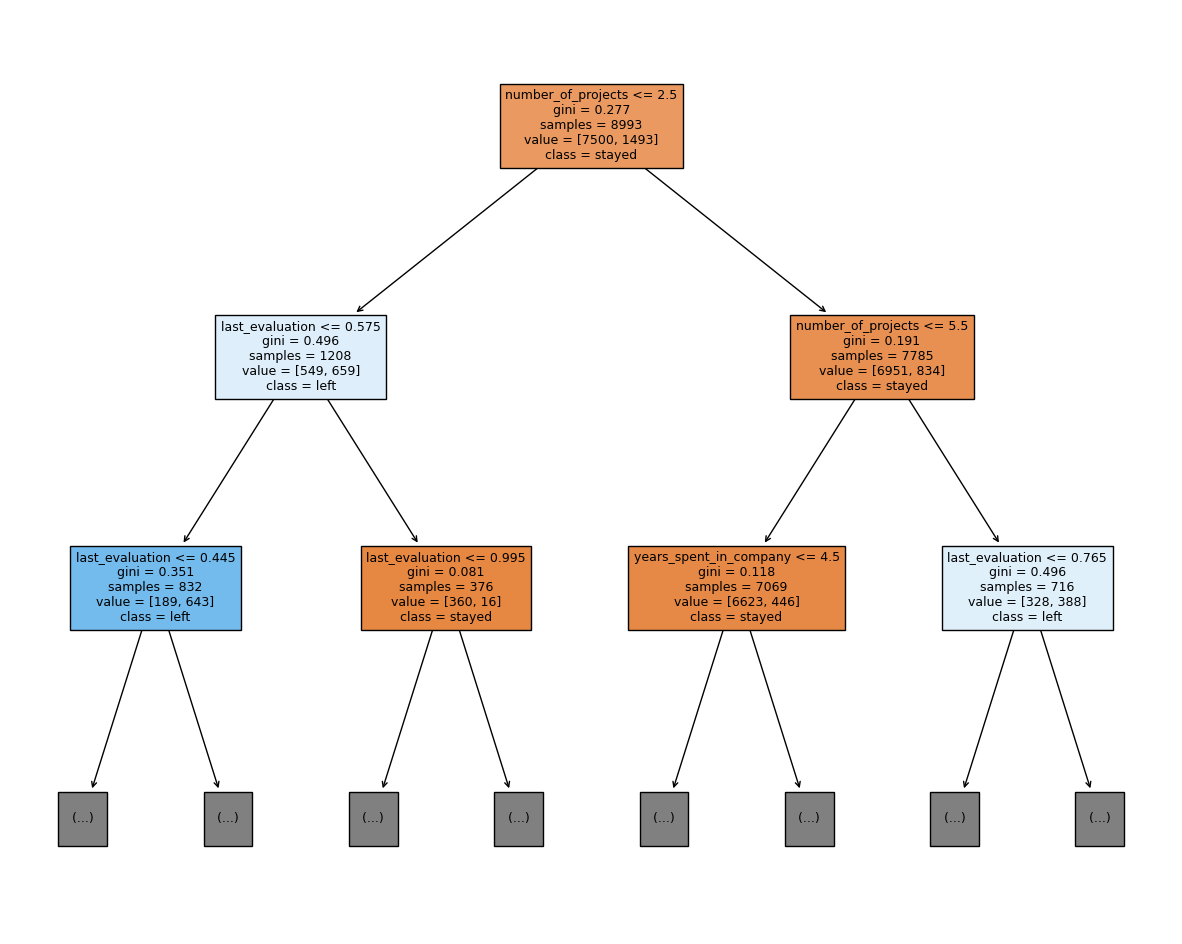

In [ ]:
# Create a Decision Tree Visualization
plt.figure(figsize=(15,12))
plot_tree(dt_fe, max_depth=2, fontsize=9, feature_names=X_fe.columns,
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [ ]:
# Update the model_scores DataFrame
model_scores = get_scores(model_name = "Decision Tree (FE)", y_test = y_fe_test, y_pred= dt_fe_pred, model_scores = model_scores)

In [ ]:
# Display the updates scores
model_scores

,Model,Precision,Recall,Accuracy,F1,roc_auc
0,Logistic Regression,0.501887,0.282378,0.831662,0.361413,0.612753
1,Decision Tree,0.904950,0.917671,0.970314,0.911266,0.949235
2,Decision Tree with Cross Validation,0.970276,0.917671,0.981654,0.943240,0.956035
3,Random Forest,0.995680,0.925703,0.986991,0.959417,0.962451
4,Random Forest (CV),0.993506,0.921687,0.985991,0.956250,0.960243
5,XGBoost (CV),0.987207,0.929719,0.986324,0.957601,0.963659
6,Logistic Regression (FE),0.442748,0.123142,0.825931,0.192691,0.545845
7,Decision Tree (FE),0.839604,0.851406,0.948299,0.845464,0.909503


### Cross Validated Decision Tree with Feature Engineered Datasets

In [ ]:
# Creating a Decision Tree classifier 'tree' with random state set to 65537.
tree = DecisionTreeClassifier(random_state=65537)

In [ ]:
# Assign a dictionary of hyperparameters to search over
cv_params = {
    'max_depth': [None, 10, 20, 30],  # None means no limit on depth
    'min_samples_leaf': [1, 5, 10],   # Minimum number of samples required to be at a leaf node
    'min_samples_split': [2, 10, 20]  # Minimum number of samples required to split an internal node
}

In [ ]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [ ]:
# Instantiate GridSearch
dt_fe_cv = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
# Fit the Model
# Wall time: 4.69 s
%%time
dt_fe_cv.fit(X_fe_train, y_fe_train)

CPU times: user 4.68 s, sys: 19.8 ms, total: 4.69 s
Wall time: 4.69 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

In [ ]:
# Retrieving the best parameters found by GridSearchCV for the Decision Tree classifier.
dt_fe_cv.best_params_

{'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [ ]:
# Retrieving the best cross-validation score (ROC AUC) found by GridSearchCV for the Decision Tree classifier.
dt_fe_cv.best_score_

0.9529380305180809

In [ ]:
# Making predictions using the best estimator found by GridSearchCV on the test set X_fe_test.
dt_fe_cv_pred = dt_fe_cv.predict(X_fe_test)

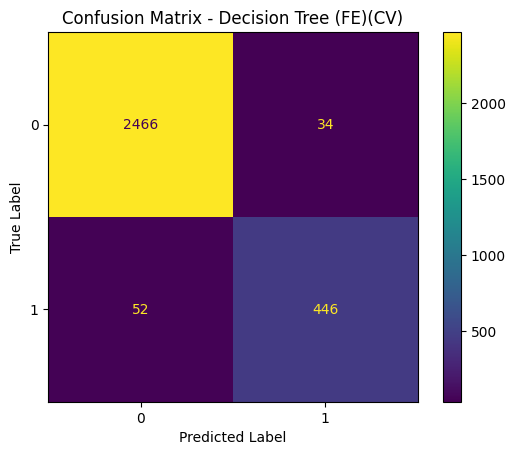

In [ ]:
# Create a confusion matrix plot.
conf_matrix_plot(model_name = "Decision Tree (FE)(CV)", model = dt_fe_cv, y_true = y_fe_test, y_pred = dt_fe_cv_pred)

In [ ]:
# Update the model_scores DataFrame
model_scores = get_scores(model_name = "Decision Tree (FE)(CV)", y_test = y_fe_test, y_pred= dt_fe_cv_pred, model_scores = model_scores)

In [ ]:
# Display the updates scores
model_scores

,Model,Precision,Recall,Accuracy,F1,roc_auc
0,Logistic Regression,0.501887,0.282378,0.831662,0.361413,0.612753
1,Decision Tree,0.904950,0.917671,0.970314,0.911266,0.949235
2,Decision Tree with Cross Validation,0.970276,0.917671,0.981654,0.943240,0.956035
3,Random Forest,0.995680,0.925703,0.986991,0.959417,0.962451
4,Random Forest (CV),0.993506,0.921687,0.985991,0.956250,0.960243
5,XGBoost (CV),0.987207,0.929719,0.986324,0.957601,0.963659
6,Logistic Regression (FE),0.442748,0.123142,0.825931,0.192691,0.545845
7,Decision Tree (FE),0.839604,0.851406,0.948299,0.845464,0.909503
8,Decision Tree (FE)(CV),0.929167,0.895582,0.971314,0.912065,0.940991


### Random Forest with Feature Engineered Datasets

In [ ]:
# Creating a Random Forest classifier with 8000 estimators and setting random state to 65537.
rf_fe = RandomForestClassifier(n_estimators=8000, random_state=65537)

In [ ]:
# Fit the model.
# Wall time: 57 s
%%time
rf_fe.fit(X_fe_train, y_fe_train)

CPU times: user 55.6 s, sys: 1.59 s, total: 57.2 s
Wall time: 57.7 s


RandomForestClassifier(n_estimators=8000, random_state=65537)

In [ ]:
# Making predictions using the Random Forest classifier rf on the test set X_fe_test.
rf_fe_pred = rf_fe.predict(X_fe_test)

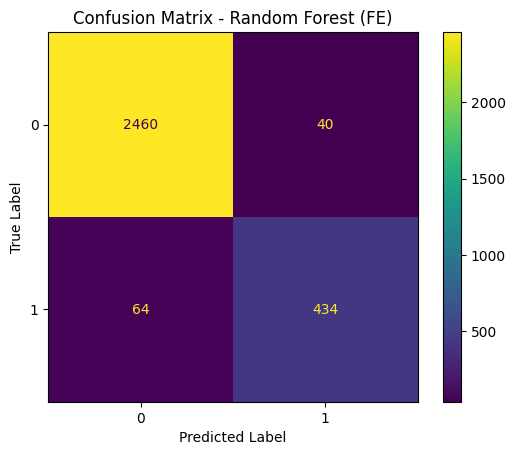

In [ ]:
# Create a confusion matrix plot.
conf_matrix_plot(model_name = "Random Forest (FE)", model = rf_fe, y_true = y_fe_test, y_pred = rf_fe_pred)

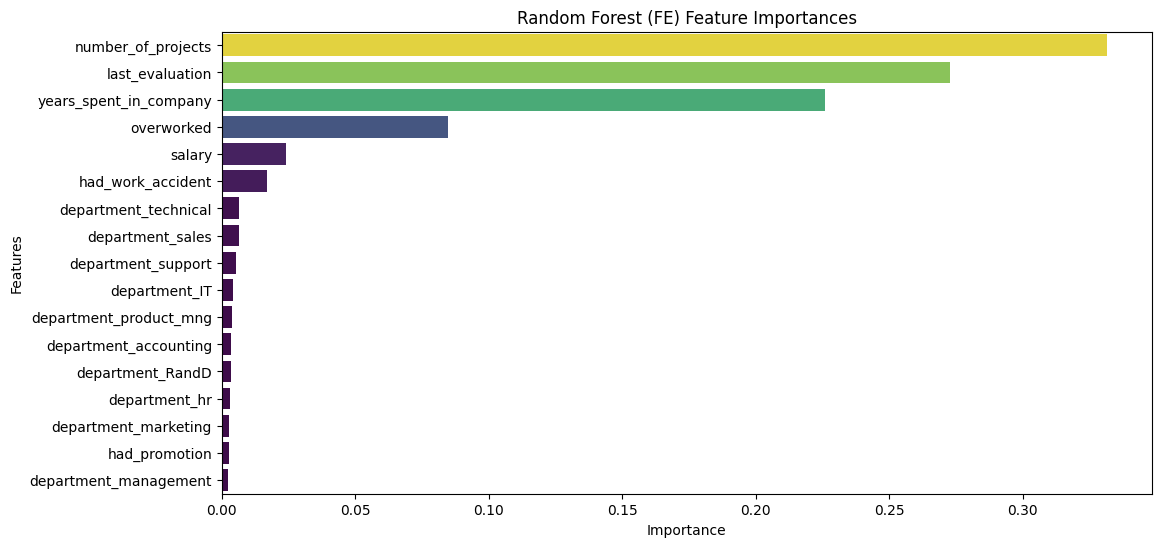

In [ ]:
# Create a feature importances plot.
plot_feature_importances(model_name = "Random Forest (FE)", model = rf_fe, feature_df = X_fe)

In [ ]:
# Update the model_scores DataFrame
model_scores = get_scores(model_name = "Random Forest (FE)", y_test = y_fe_test, y_pred= rf_fe_pred, model_scores = model_scores)

In [ ]:
# Display the updates scores
model_scores

,Model,Precision,Recall,Accuracy,F1,roc_auc
0,Logistic Regression,0.501887,0.282378,0.831662,0.361413,0.612753
1,Decision Tree,0.904950,0.917671,0.970314,0.911266,0.949235
2,Decision Tree with Cross Validation,0.970276,0.917671,0.981654,0.943240,0.956035
3,Random Forest,0.995680,0.925703,0.986991,0.959417,0.962451
4,Random Forest (CV),0.993506,0.921687,0.985991,0.956250,0.960243
5,XGBoost (CV),0.987207,0.929719,0.986324,0.957601,0.963659
6,Logistic Regression (FE),0.442748,0.123142,0.825931,0.192691,0.545845
7,Decision Tree (FE),0.839604,0.851406,0.948299,0.845464,0.909503
8,Decision Tree (FE)(CV),0.929167,0.895582,0.971314,0.912065,0.940991
9,Random Forest (FE),0.915612,0.871486,0.965310,0.893004,0.927743


### Cross Validated Random Forest with Feature Engineered Datasets

In [ ]:
# Creating a Random Forest classifier with random state set to 65537.
rf_fe = RandomForestClassifier(random_state=65537)

In [ ]:
# Defining the grid of parameters for Random Forest classifier tuning.
cv_params = {'max_depth': [4, 6],
             'min_samples_leaf': [1],
             'min_samples_split': [4, 8],
             'max_features': [4, 6],
             'n_estimators': [125, 250]
             }

In [ ]:
# Defining the scoring metrics to be used in GridSearchCV.
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [ ]:
# Creating a GridSearchCV object rf_fe_cv for Random Forest classifier tuning.
rf_fe_cv = GridSearchCV(rf_fe, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
# Fit the Model
# Wall time: 57.7 s
%%time
rf_fe_cv.fit(X_fe_train, y_fe_train)

CPU times: user 52.4 s, sys: 158 ms, total: 52.6 s
Wall time: 53 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=65537),
             param_grid={'max_depth': [4, 6], 'max_features': [4, 6],
                         'min_samples_leaf': [1], 'min_samples_split': [4, 8],
                         'n_estimators': [125, 250]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

In [ ]:
# Retrieving the best parameters found by GridSearchCV for the Random Forest classifier.
rf_fe_cv.best_params_

{'max_depth': 6,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 125}

In [ ]:
# Retrieving the best cross-validation score (ROC AUC) found by GridSearchCV for the Random Forest classifier.
rf_fe_cv.best_score_

0.968812531242085

In [ ]:
# Making predictions using the best estimator found by GridSearchCV on the test set X_fe_test.
rf_fe_cv_pred = rf_fe_cv.predict(X_fe_test)

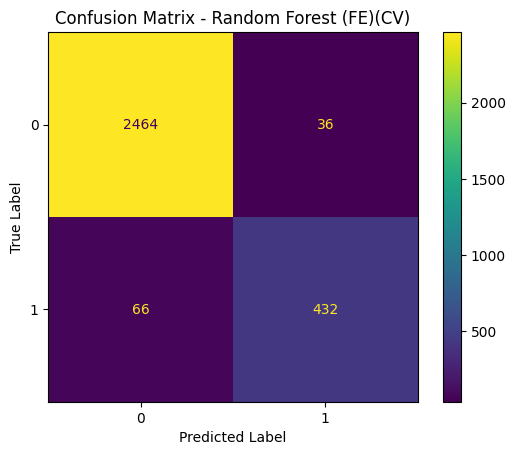

In [ ]:
# Create a confusion matrix plot.
conf_matrix_plot(model_name = "Random Forest (FE)(CV)", model = rf_fe_cv, y_true = y_fe_test, y_pred = rf_fe_cv_pred)

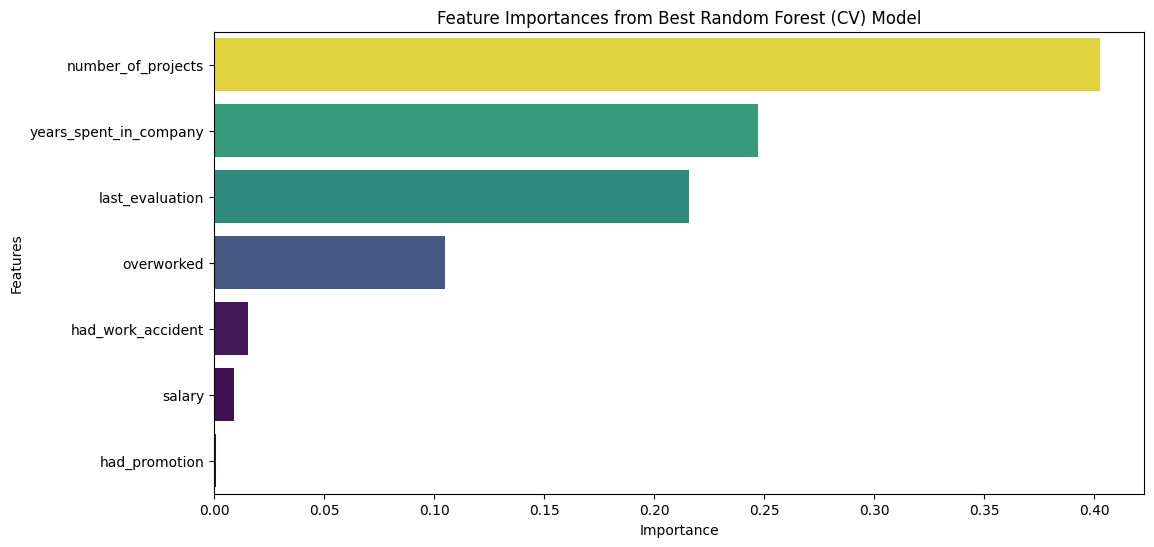

In [ ]:
# Create a feature importances plot.
best_rf = rf_fe_cv.best_estimator_

# Get feature importances from the best model
importances = best_rf.feature_importances_

# Plotting
feature_names = X_fe.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(7)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, hue = feature_importances.values, legend=False, palette='viridis')
plt.title("Feature Importances from Best Random Forest (CV) Model")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
# Update the model_scores DataFrame
model_scores = get_scores(model_name = "Random Forest (FE)(CV)", y_test = y_fe_test, y_pred= rf_fe_cv_pred, model_scores = model_scores)

In [ ]:
# Display the updates scores
model_scores

,Model,Precision,Recall,Accuracy,F1,roc_auc
0,Logistic Regression,0.501887,0.282378,0.831662,0.361413,0.612753
1,Decision Tree,0.904950,0.917671,0.970314,0.911266,0.949235
2,Decision Tree with Cross Validation,0.970276,0.917671,0.981654,0.943240,0.956035
3,Random Forest,0.995680,0.925703,0.986991,0.959417,0.962451
4,Random Forest (CV),0.993506,0.921687,0.985991,0.956250,0.960243
5,XGBoost (CV),0.987207,0.929719,0.986324,0.957601,0.963659
6,Logistic Regression (FE),0.442748,0.123142,0.825931,0.192691,0.545845
7,Decision Tree (FE),0.839604,0.851406,0.948299,0.845464,0.909503
8,Decision Tree (FE)(CV),0.929167,0.895582,0.971314,0.912065,0.940991
9,Random Forest (FE),0.915612,0.871486,0.965310,0.893004,0.927743


### XGBoost with Feature Engineered Datasets

In [ ]:
# Creating an XGBoost classifier with binary logistic objective and setting random state to 65537.
xgb_fe_cls = XGBClassifier(objective='binary:logistic', random_state=65537)

In [ ]:
# Defining the grid of parameters for XGBoost classifier tuning.
cv_params = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

In [ ]:
# Defining the scoring metrics to be used in GridSearchCV for XGBoost classifier.
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [ ]:
# Creating a GridSearchCV object xgb_fe for XGBoost classifier tuning.
xgb_fe = GridSearchCV(xgb_fe_cls, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [ ]:
# Fit the Model.
# Wall time: 1min 18s
%%time
xgb_fe.fit(X_fe_train, y_fe_train)

CPU times: user 1min 50s, sys: 1.02 s, total: 1min 51s
Wall time: 1min 10s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=65537, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 5, 10],
                         'n_estimators': [50, 100, 150]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

In [ ]:
# Making predictions using the best estimator found by GridSearchCV on the test set X_fe_test.
xgb_fe_pred = xgb_fe.predict(X_fe_test)

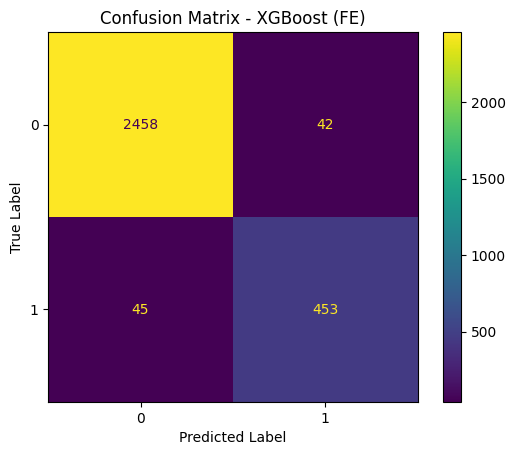

In [ ]:
# Create a confusion matrix plot.
conf_matrix_plot(model_name = "XGBoost (FE)", model = xgb_fe, y_true = y_fe_test, y_pred = xgb_fe_pred)

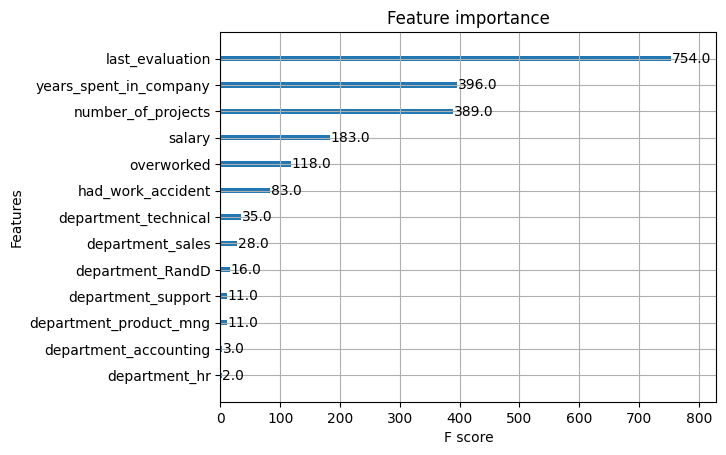

In [ ]:
# Create a feature importances plot.
plot_importance(xgb_fe.best_estimator_)
plt.show()

In [ ]:
# Update the model_scores DataFrame
model_scores = get_scores(model_name = "XGBoost (FE)", y_test = y_fe_test, y_pred= xgb_fe_pred, model_scores = model_scores)

In [ ]:
# Display the updates scores
model_scores

,Model,Precision,Recall,Accuracy,F1,roc_auc
0,Logistic Regression,0.501887,0.282378,0.831662,0.361413,0.612753
1,Decision Tree,0.904950,0.917671,0.970314,0.911266,0.949235
2,Decision Tree with Cross Validation,0.970276,0.917671,0.981654,0.943240,0.956035
3,Random Forest,0.995680,0.925703,0.986991,0.959417,0.962451
4,Random Forest (CV),0.993506,0.921687,0.985991,0.956250,0.960243
5,XGBoost (CV),0.987207,0.929719,0.986324,0.957601,0.963659
6,Logistic Regression (FE),0.442748,0.123142,0.825931,0.192691,0.545845
7,Decision Tree (FE),0.839604,0.851406,0.948299,0.845464,0.909503
8,Decision Tree (FE)(CV),0.929167,0.895582,0.971314,0.912065,0.940991
9,Random Forest (FE),0.915612,0.871486,0.965310,0.893004,0.927743


# Evaluation

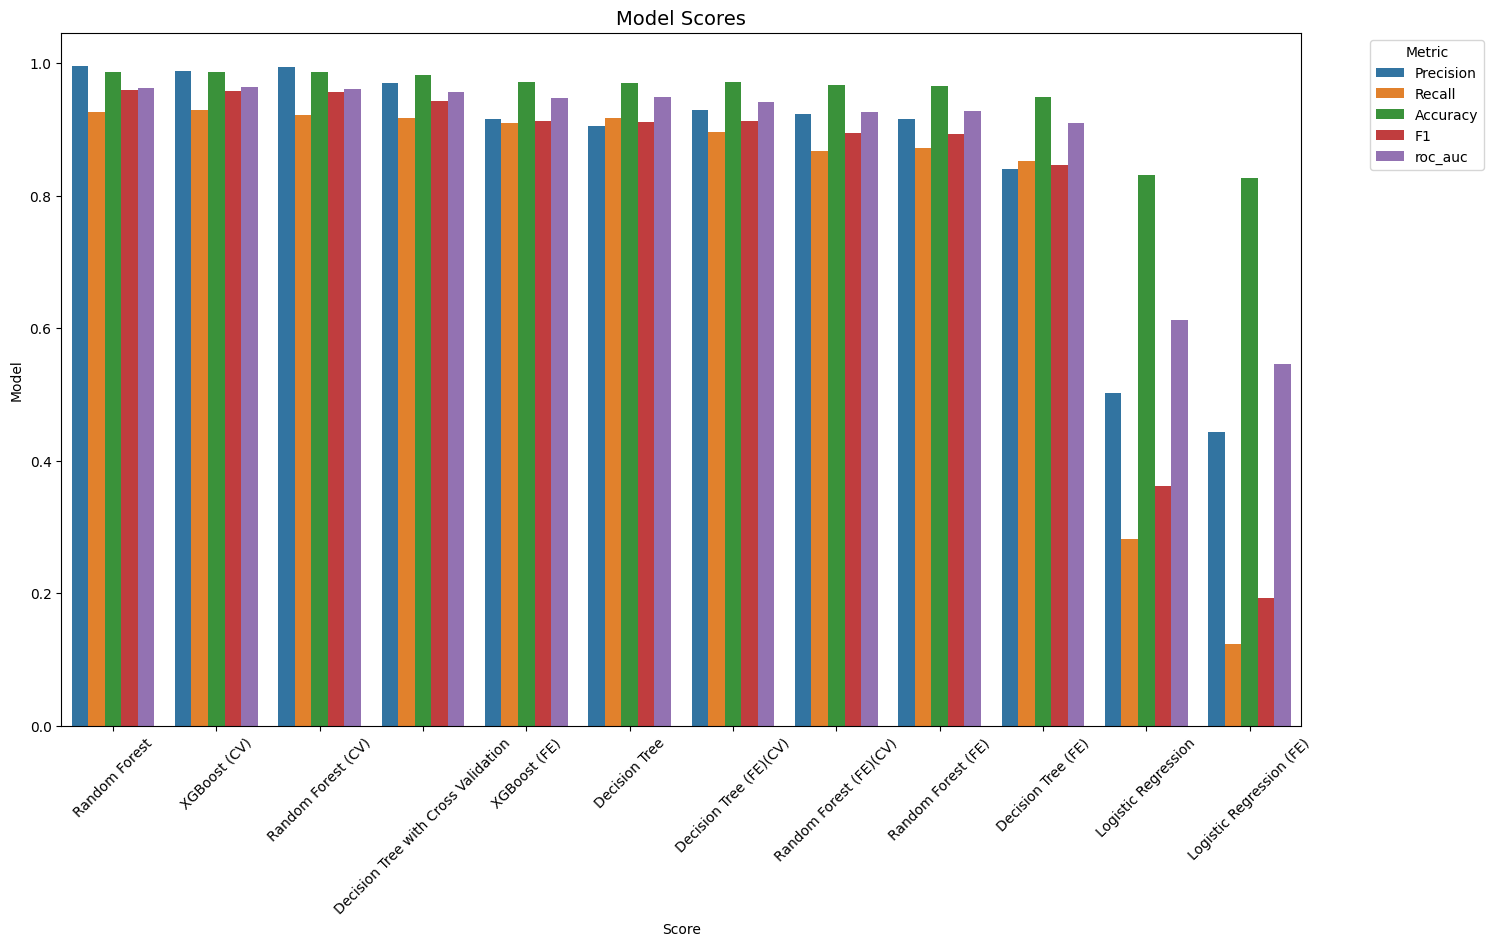

In [ ]:
melted_scores = pd.melt(model_scores, id_vars=['Model'], var_name='Metric', value_name='Score')
order = melted_scores.groupby(["Model"]).mean("Score").sort_values('Score', ascending=False).reset_index()["Model"]

plt.figure(figsize=(16, 9))
sns.barplot(data=melted_scores, y='Score', x='Model', hue='Metric', order = order)
plt.title("Model Scores", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

## Analysis of Model Performance
The analysis of various models for predicting employee turnover at Salifort Motors reveals several key insights:

### Logistic Regression (Baseline and Feature Engineered):

+ The baseline logistic regression model performed moderately with a precision of approximately 0.50 and a recall of around 0.28. This suggests that while it correctly identifies positive cases about half the time, it misses a significant portion of true positive cases.
+ The feature-engineered logistic regression model showed a drop in performance across all metrics, indicating that the chosen feature engineering techniques did not enhance the model's predictive capability. This might suggest the need for a different feature selection or engineering approach.

### Decision Tree Models:

+ The decision tree model showed significant improvement over logistic regression, particularly in recall and accuracy, with values around 0.91 and 0.97 respectively.
+ Cross-validating the decision tree model further improved the precision, recall, and F1 scores, indicating a more robust model that generalizes better to new data.

### Random Forest Models:

+ The random forest model, both with and without cross-validation, outperformed the decision tree models, with precision and recall values nearing 1.0. This indicates very high accuracy in predicting employee turnover.
+ The slight drop in cross-validated random forest model performance compared to the non-cross-validated version suggests that the latter might have benefited from specific data characteristics in the training set that did not generalize as well during cross-validation.

### XGBoost Models:

+ The XGBoost model demonstrated very high performance across all metrics, comparable to the best random forest models. This is consistent with XGBoost's reputation for producing strong predictive models due to its gradient boosting approach.

### Feature Engineered Models:

+ For decision tree, random forest, and XGBoost, the feature-engineered versions generally performed slightly lower than their non-feature-engineered counterparts. While feature engineering typically aims to enhance model performance, in this case, the selected features and transformations may not have provided additional predictive value.
+ The XGBoost model with feature engineering still maintained high performance, but not as high as the non-feature-engineered model, suggesting that the original features might already be optimal or that the feature engineering introduced some noise.

### Conclusion
The models indicate that tree-based methods (decision trees, random forests, and XGBoost) perform significantly better than logistic regression in predicting employee turnover. Random forests and XGBoost models, in particular, show the highest predictive power. While feature engineering did not universally enhance model performance, further refinement of these techniques might yield improvements. Overall, these insights provide a robust foundation for developing strategies to reduce employee turnover at Salifort Motors.